# Reproduce 7 Coefficients Workflow for TPP


- Using data from DOI https://doi.org/10.5281/zenodo.2566534
- downloaded as DownloadFromZenodo.ipynb

## Load up Linux Modules

In [3]:
module purge
module load samtools/1.3.1
module load MAPGD
module load git
module load R
module list

Currently Loaded Modulefiles:
  1) use.own            5) MAPGD/0.5          9) texlive/20151117
  2) system/0.3         6) git/2.14.1        10) R/3.5.2
  3) samtools/1.3.1     7) unixODBC/2.3.0
  4) htslib/1.3.1       8) JAGS/4.2.0


## Check the bamfiles

> no news is good news

In [3]:
cd bamfiles
md5sum --quiet -c md5sums.txt
cd -

/powerplant/workspace/cfljam/Pop-Genomics-Workshop2019


## Update the Bam Index

In [50]:
ls ./bamfiles/*.bam | parallel  samtools index '{}' 2> /dev/null

## Create a bamfile list

- update the metadata file to right path
- this is sorted by  Location field

In [22]:
sed -i  's/\/output\/genomic\/insect\/Bactericera\/cockerelli\/BAM/bamfiles/g' 190122_pop_subset_metadata.tsv 

In [51]:
head  -n 5 190122_pop_subset_metadata.tsv

Unique_sample_ID	Location2	Collection_Group	Sex	bam_path
0002_140826_Hon01_F	Sinuapa	Honduras_1	F	bamfiles/season1_trim_C732HANXX-1587-01-25-1_L007_map_190110_2_RG.bam
0003_140826_Hon02_M	Sinuapa	Honduras_1	M	bamfiles/season1_trim_C732HANXX-1587-02-25-1_L007_map_190110_2_RG.bam
0004_140826_Hon02_F	Sinuapa	Honduras_1	F	bamfiles/season1_trim_C732HANXX-1587-03-25-1_L007_map_190110_2_RG.bam
0005_140826_Hon03_M	Sinuapa	Honduras_1	M	bamfiles/season1_trim_C732HANXX-1587-04-25-1_L007_map_190110_2_RG.bam


## Create a bamfile list

In [28]:
awk 'NR > 1 {print $5}'  190122_pop_subset_metadata.tsv | tee 190122_pop_subset.bamlist | head

bamfiles/season1_trim_C732HANXX-1587-01-25-1_L007_map_190110_2_RG.bam
bamfiles/season1_trim_C732HANXX-1587-02-25-1_L007_map_190110_2_RG.bam
bamfiles/season1_trim_C732HANXX-1587-03-25-1_L007_map_190110_2_RG.bam
bamfiles/season1_trim_C732HANXX-1587-04-25-1_L007_map_190110_2_RG.bam
bamfiles/season1_trim_C732HANXX-1587-05-25-1_L007_map_190110_2_RG.bam
bamfiles/season1_trim_C732HANXX-1587-06-25-1_L007_map_190110_2_RG.bam
bamfiles/season1_trim_C732HANXX-1587-07-25-1_L007_map_190110_2_RG.bam
bamfiles/season1_trim_C732HANXX-1587-08-25-1_L007_map_190110_2_RG.bam
bamfiles/season1_trim_C732HANXX-1587-09-25-1_L007_map_190110_2_RG.bam
bamfiles/season1_trim_C732HANXX-1587-10-25-1_L007_map_190110_2_RG.bam


In [33]:
# N=143 samples 
wc -l ./190122_pop_subset.bamlist

143 ./190122_pop_subset.bamlist


In [31]:
which mapgd
mapgd -h

/software/bioinformatics/MAPGD-0.5/bin/mapgd
usage: mapgd COMMAND [OPTIONS]
mapgd version 0.4.29 written by Matthew Ackerman, Bernard Haubold, Michael Lynch, and Takahiro Maruki.
A program for maximum-likelihood analysis of population genomic data. Please
direct questions to matthew.s.ackerman@gmail.com

Commands:
  allele		Estimates allele frequencies using individual data
  fastview		Quickly displays contents of a file
  filter		Filter sites in '.map' files
  filterpool		Filter sites in '.pol' files
  filtergcf		Filter sites in '.gcf' files
  genotype		Calculate genotype probabilities for individuals
  linkage		Estimates linkage disequilibrium between loci
  pool			Estimates allele frequencies using pooled data
  proview		Prints data in the '.pro' file quartet format
  relatedness		Estimates the pairwise relatedness of individuals
  reltest		Test for sig dif between relatedness estiamtes
  sam2idx		Reformats a sam header file to a idx file
  keyinfo		Displays information regarding ke

## Set up Stuff

need to add ref to repo

In [38]:
samtools faidx $REF scaffold192_cov247 | bgzip -c >  scaffold192_cov247.fa.gz

In [41]:
samtools faidx scaffold192_cov247.fa.gz

In [1]:
mkdir -p LOG
LOGDIR=./LOG
mkdir -p MAPGD_WORKING
WORKDIR=./MAPGD_WORKING
#REF=/workspace/cflryf/git/MBIE_TPP_Populations/16_TPP_trial_contigs/TPP_10_contigs.fasta
REF=./scaffold192_cov247.fa.gz
BAMLIST=190122_pop_subset.bamlist
wc -l $BAMLIST

143 190122_pop_subset.bamlist


In [43]:
ls -lh MAPGD

total 77K
-rw-rw-r--. 1 cfljam powerplant 1.3K Feb 11 19:47 Dockerfile
-rw-rw-r--. 1 cfljam powerplant  247 Feb 11 19:47 README.md
-rw-rw-r--. 1 cfljam powerplant 1.3K Feb 11 19:47 Singularity


## Extract the Header

In [36]:
samtools view -H  $(head -n1 $BAMLIST) | tee bam.header

@HD	VN:1.5	SO:coordinate
@SQ	SN:scaffold192_cov247	LN:646567
@SQ	SN:scaffold206_cov182	LN:511775
@SQ	SN:scaffold351_cov217	LN:782681
@SQ	SN:scaffold483_cov229	LN:496407
@SQ	SN:scaffold718_cov165	LN:998265
@SQ	SN:scaffold851_cov217	LN:473775
@SQ	SN:scaffold905_cov218	LN:603004
@SQ	SN:scaffold1038_cov226	LN:1019390
@SQ	SN:scaffold2985_cov227	LN:1951005
@SQ	SN:scaffold7923_cov363	LN:35323
@RG	ID:season1_trim_C732HANXX-1587-01-25-1_L007	LB:lib1	PL:illumina	SM:season1_trim_C732HANXX-1587-01-25-1_L007	PU:unit1
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem -t 8 /powerplant/workspace/cflryf/git/MBIE_TPP_Populations/16_TPP_trial_contigs/TPP_10_contigs 10_season1_trimmed_reads/trim_C732HANXX-1587-01-25-1_L007_fwd_p.fq.gz 10_season1_trimmed_reads/trim_C732HANXX-1587-01-25-1_L007_rev_p.fq.gz


In [25]:
HEADER=./bam.header

## Generate Some Mpileup

In [5]:
samtools mpileup \
    -r scaffold192_cov247:1000-1100 \
    -q 30 \
    -Q 15 \
    -B \
    -f $REF \
    -b $BAMLIST

[mpileup] 143 samples in 143 input files
scaffold192_cov247	1000	T	18	..,......,*.,,.,.^Z.	gkFkkFFFFkFFkFFkFB	17	.$..,....,,,..,,.^],	kkkgFakakFFFFFFFg	12	.,*,,.,,...,	FFBFFTFkFBBg	28	.,....,...,,.,.,.,........^],^].	\FFFFFFkkkkFkFFFkkkFFFkgBFgB	16	.,......,...,,,.	FFkFFFkFkkFFFkkB	7	,....,,	B<gkFFF	14	....,..,,..,,,	kFkFkkFkkFFkFg	9	...,*,,,,	kkkkFFFkF	16	,..,*..,.,.....,	FF<FFkFFFFFFFFkF	18	..,,,,,...,.,....^].	FkFFFFFkgFFkFFFFFB	17	.**.,,,....,.,.,,	FFFkFFFFFFkFkkFFk	8	,,.,,,..	FFkkkJB<	17	.,,,..,...,,.,,.^K,	FkkFkFkkFFkkFFBBF	18	,.......,.,.,,,.,,	kFgFk<FFFFkkcFT<FF	11	,......,,..	FkBFFFkFFFg	12	,,,,,.,..,..	BFFFFXFFFkFF	10	.,$*..,..,.	kBF<FFFBFF	13	......,,,...^U.	FFFFBFkkBFFFB	13	.,..,,.,.,.,.	]FFkkkFkFkBkF	13	,.$....,.*,,,,	FkkkFakFFFkka	19	,...*.....,....,,,,	FBkFFFaFkFkFgFFkFFk	18	..,..,.,...,...,.,	kFFFBFkFFkFFkBkFFR	16	...,..,.,,......	kFkFkFBkkkFBgFFk	11	.,,.,...,..	kFFkkFBFkFF	24	......,,,,.,,.,.....,.,,	FkFkkkFgFkFFkFFkkFFFFFgF	14	,.,.,....,,...	FFFFkFFFFFFFFk	18	,,....,.

scaffold192_cov247	1002	T	18	..,......,..,,.,..	gkFkkFFFBkFFgFFkFB	18	..,....,,,,..,,,.,	kkcFakPFkFFFFFFBFg	12	.,.,,.,,...,	FFBFFkFkFgBg	28	.,....,...,,.,.,.,........,.	kFFFFFFk\kkFkFFFkkkFFFgkFFgB	16	.,......,...,,,.	FFkFFFkFkkFFFkkB	7	,....,,	BFgkFFF	14	....,..,,..,,,	kFkFkkFkkFFkFk	10	...,,,,,,,	kkkkFFFkBF	16	,..,,..,.,.....,	FFBFFkFFFF<FFFkF	18	..,,,,,...,.,.....	FkFFFFFggFFkFFFFFB	16	...,,,....,.,.,,	FkkFFFFFFkFgkFFk	7	,,.,,,.	FFkkkkF	19	.,,,..,,...,,.,,.,.	FkkFkFkFkFFkkFF7BFB	18	,.......,.,.,,,.,,	gFg<kFFFFFkgPFgFFF	11	,......,,..	BkFFFFkBFFk	12	,$,,,,.,..,..	BFFFFgFFFkFF	9	....,..,.	kFFFFFFFF	14	......,,,.....	FFFFFFkkFFFFBB	13	.,..,,.,.,.,.	gFFkkkFkFkFkF	13	,...,.,..,,,,	FkkFFkkBFFkkk	19	,.........,....,,,,	BFkFFF\FkFkFgFFkFFk	19	..,...,.,...,...,.,	kFFFFFFkFFkFFkFkFFT	17	....,..,.,,......	kFFkFkFFkkkFFkFFk	11	.,,.,...,..	kFFkkFFFkFF	24	...$...,,,,.,,.,.....,.,,	FkFkkgFkFkFFkFFkkFFFFFkF	14	,.,.,....,,...	FFFFkFFFFFBFkk	19	,,....,..,.,..,,,.^].	FFkkFkFFFFFkFFF<k\B	16	..,,,.,.,,.

scaffold192_cov247	1004	T	18	.$.,......,..,,.,..	kkFkkFFBFkFFkFFkFB	19	..,$.$....,,,,..,,,.,	kkBFF]kWFkFFFFFFFFg	12	.,.,,.,,...,	FBFFFkFkFkFk	28	.,A...,...,,.,.,.,.....A..,.	kFFFFFFkgkkFkFFFkkkFFFgkBFgB	17	.,......,...,,,..	FFgFFFkFkkFFFkkFB	6	....,,	FgkFFF	15	....,..,,..,,,.	kFgFkkFkkFFkFkB	10	...,,,,,,,	kkkkFF<kFF	16	,..,,..,.,.....,	FgFFFkFFFFFFFFkF	18	..,,,,,...,.,.....	FkFFFFFkkFFkFFFFFB	17	...,,,....,.,.,,^].	FkkFFFFFFkFakFFkB	8	,,.,,,..	BFkkkkk<	21	.,,,..,,...,,.,,.,.^],^].	FkkFkFkBkFFgkFFFFFBT<	18	,.......,.,.,,,.,,	gFkBkFFBFFkg\FkFFF	11	,......,,..	FkFFFFkFFFk	11	,,,,.,..,..	FFFFkFFFkFF	9	....,..,.	kFFFFFFFF	14	......,,,.....	FFFFFFkkFFFFBg	13	.$,..,,.,.,.,.	kFFkkkFkFkFkF	13	,...,.,..,,,,	BkkFFkgBFFkkk	20	,.........,....,,,,.	BFkFFFgFkFkFkFFkFFkB	20	.$.,,...,.,...,...,.,	FFFFBFBFkFFkFFkBkFFg	17	....,..,.,,......	kFFkFkFFkkkFF\FFk	13	.,,,.,...,..^].	kFFFgkFFFkFFB	23	.....,,,,.,,.,.....,.,,	BkkkPFkFaFFkkFkkBFFFFkF	14	,.,.,....,,...	FFFFkFFFFF<Fkk	19	,,....,..,.,..,,,..	FBgkFkFFF

scaffold192_cov247	1006	C	18	,.,......,..,,.,..	FkFkkFFBFgFFkFFkFF	16	.,....,,,,..,,.,	kFFTgTFkFFFFFFFk	11	,.,,.,,...,	BBFFkFkFkFk	27	.,....,...,,.,.,.,.......,.	kFFFFFFkTkkFkFFFkkkF<FTkFkF	17	.,......,...,,,..	FFTFFFkFgkFFFkkFB	4	...,	BkFF	15	....,..,,..,,,.	kFkFkTFkkFFkFkB	9	...,t,,,,	kkgFFF7gF	17	,..,t..,.,.....,,	FTFFFkFFFFFFFBkF<	18	..,,,,,...,.,.....	FkFFFFFkgFFkFBBFFF	17	.$T.,,,....,.,.,,.	7kk<FFFFFkFkkFFkB	7	,,.,,,.	BFkkk]k	21	.,,,..,...,,.,,.,.,..	FkgFkFkkFFakFFBFFFaBB	17	.......,.,.,,,.,,	FgFkBFFFFkkTFkFFF	11	,......,,..	FkFFFFkFFFk	11	,,,,.,..,..	FFFFTFFFkFF	9	.T..,..,.	kFFFFFFFF	15	......,,,.T...^].	FFFFFFkkFFFaFkB	13	,.,.,,.,.,.tT	FFFkkkFkFkFkF	13	,...,.,..,,,,	BPkFFkgFFFgkk	20	.........,....,,,,.^].	FkFFFTFkFcFgFFkFBkBB	19	.,,...,.,...,...,.,	FBF<FFFkFFkFFkBgF<T	17	....,..,.,,......	kFFkFkFFkkkFFPFFk	13	.,,,.,...,...	kFFFkkFFFkFFB	23	....,,,,.,,.,..$...,.,,.	kkkkFkFkFFkkFkkFFFFFkB<	14	,.,.,....,,...	FFFFkFFFFF7Fgk	19	,,....,..,.,..,,,..	BBkkFkFFFFFkFFFFk\B	14	.,,,.,.,,...

scaffold192_cov247	1008	A	18	,.,T.....,..,,,..^].	FkFkkFFFFgFFkFkFFB	17	.,....,,,,..,,,.,	kFF=PTFkFFFFFF7Fk	11	.,,.,,...,^].	FFFkFkFkFkB	28	.,....,...,,.,.,.,.......,.^I,	kFFFFFBk\kkBkFFFgkkFFTk<FkFT	17	.,......,...,,,..	<BWFFFkFkgFFFkkFF	5	...,,	BkFFF	15	....,..,,..,,,.	kFkBkTFkkFFkFkF	9	...,,,,,,	kgkFFFa<F	17	,.,,..,.,.....,,.	FTFFkFFFFFFFFkFgF	20	..,,,,,...,.,.....,^I,	FgFFFFFk\FFkFBaFFFgk	17	..,,,....,.,.,,.^].	kkFFFFFFkFkk<FkBB	9	,.,,,..,^].	Bkkk]g<7<	22	.,,,..,,...,,.,,.,.,..	FkkFkFk<kFFkkFBFFFFgBB	16	......,.,.,,,.,,	BkBkFFF<kT\FgFFF	12	,......,,..^I,	FkBFBFkBFFkT	11	,,,,.,..,..	FFFFgFBFkFF	9	....,..,.	kFFFFFFFF	15	......,,,......	FBBFFFakFFFgFkB	13	,.,.,,.,.,.,.	FFFkkkFkFkFgF	12	...,.,$..,,,,	Ek<FkgBFFkkT	21	.........,....,,,,..^],	BgFFa\FkFkFkFBkFFkFBB	19	.,,...,.,...,...,.,	F<FFFFFkFFkFFkFaFFP	18	....,...,,.......^I,	kFFkFkFkkkkBJ<Fk<k	12	.,,,.,...,..	kFFFkkFFFgFF	20	....,,,,.,,.,....,.,	gkkgFkFkFFkkFkFFFFFT	14	,.,.,....,....	FFFFkBFFFFFTkB	19	,,$....,..,.,..,,,..	B<kkFkFFFFF

scaffold192_cov247	1010	C	19	,.,......,..,,,....	FkFkkFFFFkFFaFkFFBB	17	,....,,,,,..,,.,^I,	FgakJFkFFFFFFFTkk	11	.,,.,,...,.	7FFkFkFkFgB	31	.,....,...,,.,.,.,.......,.,,^I,^[.	g<FFFFFkTkkFkFFFkkkFFFakFkBaBkB	17	.,......,G..,,,..	FFgFFFkFgkFFFkkFF	6	...,,,	BgFFFg	15	....,..,,..,,,.	kFkFkPFkaFFkFkF	9	..,,,,,,,	kgBFFgFBF	17	,.,,..,.,.....,,.	FgFFkFFFFFFFFkFcF	20	..,,,,,...,.,.....,,	FkFFFFFkTFFkFB]<FFTk	18	..,,,....,.,.,,..^I,	kkFFFFBFkFkkFFkFBk	7	,.,,,..	BgkkTTB	22	.,,,..,.$..,,.,,.,.,..^I,	FaaFkFkkFFkkFF<FFFkFFk	15	....,.,.,,,.,,^I,	FkFFFFkk\F]FFFk	11	,......,..,	BkFFFFkFFkg	12	,,,,.,..,..^I,	FFFFkFFFkFFa	9	....,..,.	kFFFFFFFF	16	......,,,......^I,	FF7BFFgkFFFkFgBk	12	,..,,.,.,.,.	FFkkkFkBkF\F	11	...,...,,,,	PkFFg<FFkgc	21	.........,...G,,,,..,	Fk<FTJFaFkFgFFkFFkFBF	16	,...,.,...,..,.,	FFFBFkFFkFFkgFFT	20	....,..,.,,.......,^].	gF<kFkFBkkkkFkFFkBk<	13	.,,,.,...,...	kFFFkkFFFgFFF	22	....,,,,.,,.,....,.,,.	\kkgFkFkBFkkFkFFFBFkBF	16	,.,.,....,,.....	FFFFkFFFFF7FTkBB	18	,$....,..,.,..,,,..	

scaffold192_cov247	1012	A	20	,.,......,..,,.,....	FkFgkFFFFaFFgF<kFFBB	19	,....,,,,,..,,,.,,,	BTPkaFkFFFFFFFBgkkk	11	.,,.,,...,.	FFFkFkFkFkB	30	.,...,...,,.,.,.,.......,.,,,.	kFFFBFk\kkFkFBFgkkFFFggFkFk7kB	17	.,......,...,,,..	FFkFFFaFkkFFFkkFF	6	...,,,	<kFFFg	16	....,..,,..,,,..	kFkBkaFkkFFkFkgB	11	..,,,,,,,,.	kkBFFFkFFFF	18	,..,,..,.,.....,,.	Fg<FFkFFFFFFFFkFgF	20	..,,,,,...,.,.....,,	FkFFFFFkgFFkFFaFFFkk	18	..,,,....,.,.,,..,	kkFFFBFFkFakBFkFBk	9	,$.,,,$..,.	BgkTgkFBB	23	.,,,..,,..,,,.,,.,.,..,	FkTFkFkFFFkFkFFBFFFkFFg	17	......,.,.,,,.,,,	FTF<BFFFkgTFgFFFk	12	,......,,..,	BgFBFFkFFFkW	12	,,,,.,..,.,.	FFFFgFFFkFgB	8	.$,.,..,.	FFFFFFBF	15	.....,,,......,	BFF<FakFFFkFgFk	13	,.,.,,.,.,.,.	FFFkgaFk<kBkF	12	.,.,..,,,,,.	FFgF<BFFakkF	21	.........,....,,,,..,	FkFFg\FkFaFkFFkFFkFFF	16	,..,.,...,...,.,	FF<FkFFkFFkFTFFg	20	....,..,.,,.......,.	kBFk<kF<kkkkFPFFkFkB	13	.,,,.,...,...	gFFFkkFFFkFFF	23	.$...,,,,.,,.,....,.,,..	kTkTFkFkFFkkFkFFFB<kBFB	15	,.,.,....,.....	FFFFkFFFFFFggBB	16	....,..,.,

scaffold192_cov247	1014	T	20	,.,......,..,,.,....	FkFkkFFFFkFFkFFkFFFF	19	,....,,,,,..,,,.,,,	BgakkFkFFFFFFF7kkkk	12	.,,.,,...,.^],	<FFkFkFkFkFF	31	.,...,...,,.,.,.,........,.,,,.	kFFFFFkgkkFkFFFkkkFFFgk<FkBTFkB	17	.,......,...,,,..	FFTFFFkFkkFFFkkFF	6	...,,,	<kFFFk	16	....,..,,..,,...	kFgFkkFkkFFkk\BB	12	..,$,,,,,,,..	kgBFFFkFFFFB	18	,..,,..,.,.....,,.	FkFFFkFFFFFFFFkBkF	20	..,,,,,...,.,.....,,	FkFFFFFkgFFkFFkFFFkk	17	..,,,....,.,,,..,	kkBFFFFFkFkkFkFFk	6	.,,.,.	kkgkFF	23	.,,,..,,..,,,.,,.,.,..,	FkkFkFk<FFkFkFFFFFFkFFk	16	.....,.,.,,,.,,,	gFBFFFFkTaFkBFFk	12	,......,,..,	BgFFFFkFFFkk	13	,,,,.,..,..,.	FFFFTFFFkFFkB	8	,..,..,.	BFFFFFFF	15	.....,,,......,	FFFFFgkFFFkFkFk	13	,.,.,,.,.,.,.	FFBkkkFkFkBkk	12	.,.,..,,,,,.	FFkF<FFFkkkF	21	.........,....,,,,..,	FkFFg\FkFgFaFFaFFkFFF	17	,...,.,...,...,.,	F<FFFaFFkkFkFkFFk	19	,...,..,.,.......,.	FFFkFkFFkkkFgFkkFkB	13	.,,,.,...,...	kFFFkkF<FkFFF	23	...,,,,,.,,.,....,$.,,..	kk\FFkFkFFkkBkFFFBBkFFB	16	,.$,.,....,,.....	BFFFkFFFFFFFkkFF	17	....,..,.

scaffold192_cov247	1016	G	20	,.,......,..,,.,....	FgFkkFFFFkFFkFBkFFFF	18	,$.$...,,,,,..,,.,,,	BEakTFkFFFFFFFakkk	12	.,,.,,...,.,	7FFgFkFkFkFg	30	.,...,...,,.,.,.,.......,.,,,.	g<FFFFkTkkFkFFFkkkFFF\kFkFgBkF	17	.,......,...,,,..	FFJFFgkakkFFFkkFF	6	...,,,	FkFFFk	17	....,..,,..,,,...	kFkFkTFkkFFkFkTFB	11	.,,,,,,,,..	kFFFBkFFF=B	18	,..,,..,.,.....,,.	Fg<FFkFFFFFFFBkBkF	20	..,,,,,...,.,.....,,	FkFFFFFkkFFkFFkFFFak	18	..,,,....,.,.,,..,	kkFFFBFF\FkkBFkFFk	6	.,,.,.	kggkBF	23	.,,,..,,..,,,.,,.,.,..,	FggFkFk<FFkFkFFFFFFkFFk	16	.....,.,.,,,.,,,	gFFFFFFk>kFkFFFk	11	,......,..,	BkFFFFkFFkk	13	,,,,.,..,..,.	FFFFTFFFkFFkF	9	,...,..,.	BF<FFFFFF	14	....,,,......,	BFFFkkBFFkFkFk	13	,.,.,,.,.,.,.	FFFkkkkkBkBkk	10	.,.,.,,,,.	<F=FFFgkaF	21	.........,....,,,,..,	FaFFPPFkFkFkFFkFFkFFF	17	,...,.,...,...,.,	FFFBFgFFkkFkFgBFT	20	,...,..,.,,.......,.	FF<kFkFFkkFkFaFkkFkF	12	.,,,.,...,..	kFFFkkFBFkFF	21	...,,,,,.,,.,.....,..	kk\FFkFgFFkkFkFFFFgFF	16	,,.,....,,......	BFFkFFFFFBBkkFFF	17	.$...,..,.,..,,,..	TkFkF

scaffold192_cov247	1018	T	20	,.,......,..,,.,....	FkFkkFFFFkFFkFFkFF<F	18	...,,,,,..,,,.,,,,	gkkFkFFFFFFFBkkBkk	12	.,,.,,...,.,	FFFkFkFkkaFg	31	.$,...,...,,.,.,.,........,.,,,.	kBFFFFkgTkFkFFFkkkFFFkkFFkFPBkB	17	.,......,...,,,..	FFaFFkTkkkFFFkkFF	7	...,,,.	FkFFFkB	17	....,..,,..,,,...	kFkkkkFkkFFkBkkFF	11	,,,,,,,,,..	FFFFFkFFBcF	17	,.,,..,.,.....,$,.	BkFFkFFFFFFFFkBkB	20	..,,,,,...,.,.....,,	FkFFFFFkkFFkFF\FFFTk	18	..,,,....,.,.,,..,	kkFFFFBFkFkk<FkFFk	6	.$,..,.	kgkBFF	24	.,,,..,,..,,,.,,.,.,..,,	FkkFkFkFFFkFkFFFFFFkFFkB	15	.$...,.,.,,,.,,,	kFFFFFkkkF]BFFk	11	.C....,,..,	kFFFFkFFFkg	13	,,,,.,..,..,.	FFFF\FFFkFFkF	9	,$...,..,.	BFFFFFFFF	14	....,,,......,	FBFFkaFFFkFkFk	13	,.,.,,.,.,.,.	FFFkkgkkFkFkk	12	.,.,.$.,,,,,.	FFkFFFFFgkkF	21	.........,....,,,,..,	FkFFkgFgFkkkFFkFFkFFB	18	,...,.,...,...,.,.	FFFFFkFFkkFkFkFFkB	19	,...,..,.,,......,.	BFFkFkFFkkBk<gkkFgF	13	.,,,.,...,...	kFFFakFBFkFF<	23	...,,,,,.,,.,.....$,,..^]C	kkTFFkFgFFkkFkFFFFgFFFB	17	,$,.,C...,,.......	BFFkFFFFFFFTkFFFB	18	,.

scaffold192_cov247	1020	A	19	,.,..T..,..,,.,....	FkFkkFF<kFFgFFkFFFF	17	..,,,,t..,,,.,t,,	agFkFFFFFFF7Tk7kk	12	.t,.,,...,.,	FFFkFkFkkaFk	31	,...,...,t.,.,,.,T.......,.,,,.	BFFFFkTkkFkFkFFPkkFFF\k<FkBT<kF	17	.,......,...t,,..	FFPFkkkkakFBFkkFF	6	..,,,.	kFFFkB	17	....,..,,..,,,T..	kFkTkTFkgFFkFggFF	10	,t,,,,,,..	FFFFgF7FgF	16	,.,,..,.,.....,.	B\FFkaFFF<kFFkkF	20	..,,,,,...,.,.....,,	FkFFFFFkTFFkFBkFFFkk	19	..,,,....,.,.,,..,^],	kkBFFFFFkFgkFFkFFk7	6	,$,..,.	gFk<BF	21	.,,..,,.T,,,.,.,.,..,	BkgkFkFFFkFkFFFFFkFFk	15	.,..,.,.,,,.,,,	7FFFFFkgTFgFFFk	11	....T.,,..,	kFFFFkFFFkk	14	,,,,.,..,..,.,	FFFFgFFFkFFkFF	8	...,..,.	FBFFFFFF	14	....,,,..T...,	FFFFggFBFkFgFk	13	,.t.,,.,.,.,.	F<FkkgkkFaFkk	11	.,.,.t,,,,.	FFkFBFBkkaF	21	.........,....,,t,..,	7gFF\XFkkkkkF<kFBkFFF	19	,...,T,...,.T.,.,.,	FBBFFkFFkkFkFkFFTBF	20	,...,..,.,,.......,.	BF<kFkFFkgBk<XFgkFkF	13	.,,,.,...,...	kFFFkkBBFgFFB	22	...$,,,,,$.,,.,....,,...	gkTFFkFgFFkkFkFFFkFFFB	16	,.,....,,.......	FFkFFFFF<FkkFFFB	18	,G..,.T,.c..,,,.C.	BkFk

scaffold192_cov247	1022	A	20	,.,......,..,,.$,....	FkFkkFF<FgFFgF7kFFkF	17	..,,,,,,..,,.,,,,	aTFkFFFBFFFFTkBkk	12	.,,.,,...,.,	FFFkFkFkkkFk	30	,$..,...,,.,.,,.,........,.,,,.	BFFFkPkgFkFkFFkkgFFF\kBFkFkBkF	17	.,......,...,,,..	FFaFgkkkkkFFFkkFF	6	..,,,.	kFFFkF	17	....,..,,..,,,...	gF\gkTFgaFFkFkgFF	10	,,,,,,,,,.	FFFFFkFFFT	15	..,,..,.,....,.	\7FFakFFFaFFkTF	22	..,,,,,...,.,.....,,^],^I,	FkBFFFFkgFFkFFkFFFkkFa	19	..,,,....,.,.,,..,,	kkFFFBFBaFkkFFkFFk<	6	,..,..	Fk<FF<	22	,,,..,,..,,,.,,.,.,..,	k<FkFkFFFkFgFBBFFFkFFk	15	,..,.,.,,,.,,,^Z,	FFFFFggTFgFFFkB	12	......,,..,^I,	PFF<FkBFFkkg	14	,,,,.,..,..,.,	FFFF\FFFkFFkFB	8	...,..,.	FFFFFFFF	14	....,,,......,	FFFFTgFFFkFgFk	13	,.,.,,.,.,.,.	FBFkkkkkFgTkk	10	.,.,.,,,,.	FFkFFFakkF	21	.........,....,,,,..,	FkFF\PFgkkkkFFkFFkFFF	18	,...,.,...,..,.,.,	FFF<FkFFkkFkTFFTFF	18	...,..,.,.......,.	FFkFkFBkTkFgFakFkF	12	.,,,.,...,..	kFFBkkBFBkFF	20	.$.,,,,,.,,.,....,...	gkFFFkFFFkkFkFFFTFFB	16	,.,....,,.......	FFkFFFFFFFkkFFFF	18	,...,..,.,..,,,...	FkFkFF

scaffold192_cov247	1024	T	18	,.,.....,..,,,....	FkFkkFFFkFFkFFFFkF	17	..,,,,,,..,,.,,,,	aWFkFFFBFFFF\kFkk	12	.,,.,,...,.,	BFFkFkFkkaFk	28	.,...a,.,.,,.,........,.,,,.	FFkagkFkFkFFkkkkFFgkFFkFaBkF	17	.,......,...,,,..	FFPFkkkkgkFFFkkFF	6	..,,,.	kFFF\F	17	....,..,c..,,,...	kFkkkcFggFFkFaaFF	11	,,,,,,,,,..	FFFF7kFFFTF	15	.,,..,.,.....,.	gFFkkFFFBkFFkkF	22	.$,,,,,,...,.,.....,,,,	<BFFFFFkTFFkFFkFFFgkFk	20	.,.,,,....,.,.,,..,,	FFkFFFFFFkFkk<FkFFkF	6	,.,..^],	FkBFBF	24	.,,$,..,,..,,,.,,.,.,..,,	FkBFkFk<FFkFkFF7FFFkFFkB	16	.,..,.,.,,,.,,,,	BFFFFFkgTBkFFFkF	12	......,,..,,	kFFFFkFFFkgk	14	,,,,.,..,..,.,	BFFFTFFFkFFaFF	8	...,..,.	FFFFFFFF	14	....,,,......,	FFFFakFFFkFkFk	13	,.,.,,.,.,.,.	FFFgggkkFkPkk	11	.,.,.,,,,,.	FFkFFFFkkkF	21	......$...,....,,,,..,	BgFFkEFkkkgkFFkFFkFFF	19	,...,.,...,...,.,.,	F7<FFgFFacFk<kFF\F<	18	...,..c.,.......,.	FFkFkFFkkkFk<kkFkF	13	,,,,.,...,...	FBFFkkBFkkFFF	22	.,,,,,.,,,.,....,,....	kFFFkFFFgFkFkFFFkFFFFB	16	,.,....,,.......	FFkFFFFFFFkkFFFF	20	,...,..,.,..,,,...,

scaffold192_cov247	1026	T	18	,.,.....,..,,,....	FkFkkFFFkFFkFFFFkF	19	..,,,,,,..,,,.,,,,.	kkFkFFFFFFFFBgkFkkB	12	.,,.,,...,.,	FFFkFkFkkkFk	28	.,...,,.,.,,.,........,.,$,,*	FFk]kkFkFkFFakkkFFkk<FkFJBkF	17	.,......,...,,,..	FBcFkkkkkkFFFkkFF	6	..,,,.	kFFFTF	18	.$...,..,$,..,,,...,	kFkkkkFgkFFkBkkFFF	11	,,,,,,,,,..	FFFFFkFFFgF	16	..,,*.,.,.....,.	k7FFkkFFFFkFFkkF	20	,,,,,*..,*,.*...,,$,,	FBFFFkkFFkFFkBFFgkFa	19	,.,,,....,.,.,,*.,,	FkFFFFFFkFgkBFkFFkB	7	,..,..,	Fk<FFF]	22	.,,..,..,,,.,,.,.,..,,	TgFkFkFFkFkFFFFFFkFFkB	16	.,*.,.,.,,,.,,,,	FFBFFakkTBkFFFkF	12	..$....,,..,$,	kFFFFkFFFkTk	14	,,,,.,..,..,.,	BFFFJFBFkFFkBF	8	...,..*.	FFFFFFFF	15	....,,,......,^],	FFFFkkFFFkFkFkF	13	,.,.,,.,.,.,.	FFFkkkkkFkkkk	11	.,.,.,,,,,.	FBkFFFFkkkF	20	.*......,...,,,,,..,	FkFFgFkkkkgFkFFk<FFF	18	,..,.,...,..*,.,.,	BFFFkFFkkFkFkFF]FF	18	...,..,.,.G.....,$.	FFkFkFFkkkFgFkkFkF	13	,,,,.,...,...	BBFFkkFFkkFFF	23	.$,,,,,.*,,.,...*.,,....	BFFFFFFFBFkFkFFFFkFFFFB	16	,.,....,,.......	FFkFFFFFBFkkFFFF	19	,..,..,.,.*,,,

scaffold192_cov247	1028	C	18	t.,.....,..,,t....	FaFkkFFFkFFkFFFFgF	16	..,,,,,,A.,.,,$,.	gTFkFFFBFFFTkkkB	11	.,,.,,..,.,	7FFgFkkkkFk	25	.,...,,.,.,,.,.....TT,.,$.	FFkTkkFkFkFFkkkkFFTkFkFkF	17	.,......,...,,,..	BBTFkkkkgkFFFkkFF	6	..,,,.	kFFFaF	16	...,..,,..,,...,	FkkkTFFTFFkkgFFF	11	,,,,,,,,,..	FFFFFkFBF=B	14	.,,..,.,....,.	gFFkkFFFkFFkkF	18	,,,,,...,.,....,,,	FFFFFk\FFkFkBFFkFT	18	,.,,....,.,.,,..,$,	FkFFFFFkFkk<FkFFk7	5	,...,	FkFFP	21	.,,..,,..,,,.,.,.,..,$	\gFkFkBFFgFkFFFFFkFFk	12	,..,.,.,t$,,,$	<FFFkkTTBFFk	8	.,.....,	FFBFkFkk	13	,,,,.,.,..,$.,	FFFF<6FkFFkFF	7	..,..,.	FFFFFFF	13	...,,...AA.,$,	FFFTaFFkFkFk<	13	,.,A,,.,.,.,.	FFFkkakk<kkkk	10	.,.,.,,,,.	F<kFFFkk]F	18	......,....,,,,..,	gFBFkkkkgFBkFFkFFB	19	,...,.,...,...,.T.,	B7FBFkFFgkFk<kFBFFF	16	...,..,.a.......	FFkFkFFkkBcFkkFF	12	,,,.,...,...	BFFkkFFkkFFF	21	,,,,,.,,.,...,.,,....	BF<FFFFFkFkFFFFgFFFFF	15	,.,....,.......	FFkBFFFFFkkFFFF	19	..,..,.,..,,,+1t.+1T...,,	gkFFFFFkFFFFFF>FFFg	12	,.,.,,....T,	FFkkFkkFaFFg	15	...,.,,,.....

scaffold192_cov247	1030	T	18	,.,.....,..,,,....	FgFkkFFFkFFkFFFFkF	16	..,,,,,,..,.,,,.	kaFkFFFFFFFkkFkF	11	.,,.,,..,.,	FBFkFkkkkFk	25	.,...,,.,.,,.,.......,.,.	FFkkkkFkFkFFkkkkFFkkFk<FF	17	.,$......,.$..,,,..	F<kFkkkkkkFFFkkFF	6	..,,,.	kFFFkF	16	...,..,,..,,...,	FgakkFFkFFkkTFFF	11	,,,,,,,,,..	FFFFFkFFF]F	16	.$.$,,..,.,.....,.	kFFFkkFFFFkgFkkF	19	,,,,,...,.,.....,,,	FFFFFkkFFkFFkFFFaFk	17	,.,,,...,.,.,,..,	FgFFFFFkFkkFFkFFF	6	,.,..,	FkFBFT	22	.,,..,,..,,,.,,.,.,..,	ggFkFkFFFgFkFFFFFFkFFB	12	.,..,.,.,,,,	FFFFFkkkgFFF	9	.,...,..,	FFFFkFFkk	12	,,,.,..,...,	FFFkFFFkBFFF	7	..,..,.	BFFFFFF	12	...,,......,	<FFkkFFkFkFF	13	,.,.,,.,.,.,.	FFFkkgkkFkgkk	11	.$,$.,.,,,,,.$	FBgFFFFkkkF	21	.$.$....,...,.,,,,,..,,	FFFFkkkgkFF<kFFkFFFFF	18	..$.$,.,...,...,...,	<FFFaFFkkFkBkFFFFF	16	.$..,..,.,.......	FFkFkFFkk<aFkkFF	11	,$,,.,...,..	BBBkkFFkgFF	21	,,,,,.,,.,...,.,,....	BFFFFFFFkFkFFFFgFFFFF	15	,.,....,.......	BFkFFFFFFkkFFFF	18	..,..,.,..,,,...,,	gkFFFFFkFFFFkkFFFk	13	,.,.,,......,	FFkaFkkFkFBFk	15	...,

scaffold192_cov247	1032	T	18	,.,$.....,..$a,,....	FgFkkFFFkFFgFFFFkF	15	..,,,,,.A,.,,,.	kTFkFFFFFFkkFkF	10	,,.,,..,.,	BFkFkkkkFk	24	.$,..C,,..,,.,.......,.,.	FFkkkkFkkFFkkkkFFkkFkFFF	15	......,..,,,,..	kFkkkkgFFFFkkFF	6	..,,,.	kFFFkF	16	.$.$.,..,,..,,...,	FkkkkFFkFFkk\FFF	11	,,,,,,,,,..	FFFFBkF<F=F	15	,,..,.,...A.,,.	FFkkFFFFkkFaFkF	19	,,,,,...,.,.....,,,	FFFFFkgFFkFFkFFFcFg	18	,.,,,....,.,.,,..,	FgFFFF<FkFkkFFkFFF	6	,.,..,	FkFFF=	21	.,..,,..,,,.,,.,A,..,	kFkFkFFFg<kFFFFFFkFF7	12	.$,..,.a.,,,,	BFFFFkkgTFFF	9	.,...,..,	FFFFkFFkk	12	,,,.,..,...,	FFFPFFFkFFFF	7	..,..,.	BFFFFFF	12	...,c......,	BFFkkFFkFkFF	13	,.,.,,.,C,C,.	BFFkkkkkFkkkk	8	.,.,,,,,	gFFFBkga	19	....,...,.,,,,,..,,	BFkkkTgFFFkFFkBFFFF	16	.,.,...,...,...,	FFkFFkkFkFkFFFFF	15	..,..,.,.......	FkFkFFkkBRFkgFF	9	,,.,.....	BFkkFFkFF	20	,,,,.,,.,...,A,,....	FFFFFFFkFkFFFBkFFFFF	15	c.,....,,...A..	BFkFFFFFBTkFFFF	18	.$.,.$.,.,..,,,...,,	kgFFFFFkFFFFkaFFFg	11	.,.,,.....,	FkkFkkFkFFk	15	...,.,,,..A...,	FkFFFkkFF<TFFkk	13	,..-1A,.,,,..,

scaffold192_cov247	1034	T	15	,$.-2GA.-2GA.-2GA.-2GA.-2GA,-2ga.-2GA,-2ga,,.-2GA.-8GAATATTG.-2GA.-2GA	FkkFFFkFTFFFFgF	16	.$.$,-2ga,$,-2ga,-2ga,$,-2ga.$.-2GA,-2ga.-2GA,$,-2ga,-2ga.-2GA	k=FkFFFFFFFkkFkF	10	,$,-2ga.-2GA,-2ga*.-2GA.,.-2GA,-2ga	BFkFkkkkFk	23	,$.-2GA.-2GA.-2GA,-2ga,-2ga.,-2ga.-2GA,-2ga,-2ga.,-2ga.-2GA.-2GA.-2GA.-2GA.-2GA.-3GAA.$,-2ga,-2ga.-2GA	BkkkkFkFkFFkkkkFFkkFkFF	15	.-2GA.-3GAA.-2GA.-2GA.-2GA.,-2ga.-2GA.-2GA,-2ga,-2ga,,-2ga.-2GA.$	TFkkkkkFFFFkkFF	6	.-2GA.,-2ga,,-2ga.-2GA	kFFFkF	15	.$,$.-2GA,-2ga.-2GA,-2ga,-2ga.-2GA.-2GA,-2ga,-2ga.-2GA..-2GA,-2ga	kkkFFFkFFkkTFFF	11	,$,$,-2ga,-2ga,-2ga,$,-2ga,,$.-2GA.	FBFF<kFFFEF	15	,-2ga,-2ga.-2GA.,-2ga.-2GA,-2ga.-2GA.-2GA..-2GA.$,-2ga,-2ga.-2GA	FFkkFBFFkkFkFkF	17	,,-2ga,-2ga,-3gaa,.-2GA.-2GA.-2GA.-2GA,-2ga*.-2GA*.-2GA.-2GA,-2ga,	BFFFFkgFkFBkFFFFk	17	,-2gaA,-2ga,$,.-2GA.-2GA.-2GA.-2GA,-2ga.-2GA,-2ga,-2ga,.-2GA.-2GA,-2ga	FBFFFFBFkFkkFkFFF	6	,-2ga.,-2ga.-2GA.-2GA,	FkFBFP	21	.,-2ga.-2GA.-2GA,$,-2ga..-2GA,$,$,$.-2GA,-2ga,-2ga.,-2ga.-2GA,$..-2GA

scaffold192_cov247	1035	G	14	********aa****	kaFFFkFkFFFF]F	12	************	FFFFFBFFkFkF	9	*****.,**	FkFkkgkFk	22	*****A****T***********	kkkgFTFkFFkkkkFFkkkBFF	14	*****.*****a**	kFkkkkkFFFFkkF	6	*T*,**	kFFFkF	14	**********T***	kFFFkFFkkkFFFF	7	****t*.	FFFFF=F	14	***.*****.****	FFkkFFFFkkFFkF	18	t***t************,	BFFFFkkFkFBkFFFBFk	16	**,*********,***	FFFF<FkFgFFFkFFF	6	*T***,	FkFBFJ	17	T$****T****T**.***	FFkkFFFFFFFFFFF<F	10	**********	FFFkkkFFFF	9	********,	BFFFkF<kk	12	,******,**.t	FFFFFFFkFFFF	6	**.***	FF<FFF	11	*******AA**	FFkkFFkFgFF	10	t$*********	BFkgkBkgkk	9	t***t***,	FFFFkFkkF	16	.*****,a*******.	FkkFFFkFFkFFFFFB	14	T$,*T.*****.**^],	BBFkkFkkFFBFF7	10	,.****T***	FkFFF=FkFF	9	**t*.***,	FkFFBkFF7	18	******************	FFFFFkFkFFFFkFFFFF	12	,***********	kFFFFFkkFFFF	17	*t**************t	FBFFFkFFFFFkgFFFk	8	**T****,	kFkFkFFT	15	**.**,t********	FkFFFkkFFFkFFka	10	*T,***T***	kFFFFFkkFF	4	****	FkaF	12	*******,*t*,	FFkFkFkFgFFk	10	***,*****.	FFkFgFFkFF	8	**.t***T	kFTFFFFF	12	*,*******

scaffold192_cov247	1038	T	14	.....,.,,,.*..	kgFFFkFkFFFFkF	14	,,,,,,.,.,,.^],^],	FFFBFFFFkFkFFF	11	,.,,..,.,^],^].	FkFkkkkFkFF	22	...,,.,.,,*,......,.,.	kkkkFkFkFFkkTkFFkkkFFk	14	......,..,,,,.	\FkkkkkFFFFkkF	6	..,,,.	kFFFkF	15	.,.,,..,,...,,^Z,	aFFFkFFkkkFFFFk	8	,,,,*..,	FFFFFEFB	17	,,..,.,....,,.^N.^B.^].	FFkkFFF<kkFFkFFFF	20	,$,,,*....,.....,,,^Z.^].	BFFFFkkFkFF\<FFFBkFB	18	,,,....,.,.,,..,^],^],	FFFFFFkFkFFFkFFFgF	8	,*,..,^],^].	FaFBF=kF	18	,..,...,,.,...,,.^M.	FkkFFFFFFkFFFF7FBF	11	..,.,.,.,,^\,	FFFkkgFFFFF	9	.,...,..,	BFFFkBkkk	14	,,,,.,.,...*^Z,^].	FFFFFFFkFFFFkB	7	.,..,.^].	FFFFFFF	11	..,,......,	FFkkFFkgkFF	9	.,,..,.,.	FkkkFkkkk	9	*.,,*,,,,	FFFFkFkkF	16	...,.,,,,,..,,.^],	gaFFBkFFkBFFFFBk	13	.*.,..,,...,,	FkkFkkFFF<kFF	10	,..,,.*...	BkFFFaBkFF	11	,.*......,^W,	<kFFFkFFFFF	22	,,.,,.,...,.,,....^],^],^].^X.	FFFFFkFkFkFFkFFFFFFkBF	12	,....,......	kFFFFFgkFFFF	16	,.,.,..,,,,...,*	FFFFkFFFFFkaBFFk	8	.,*....,	kF\FkFFk	16	...,.,*,......,^].	FkFFFgkFFFkFFkaB	12	..,.,,*.,,.^].	kFFBFFkF

scaffold192_cov247	1041	T	14	..G.,.,,,.*..,	kkFFkFkFFFFgFg	13	,,,,,,.,.,.,,	FFFBFFFF\kFFF	11	,.,,..,.,,.	FkFkkkkFkFF	23	...,g.,.,,.,G.....,.,..	kkgkFkFkFFgkkkBFggkFFkF	14	......,..,g,,.	aFkkkkkFFFFkkF	7	..,,,.^],	kFFFkFk	16	.,.,,..,,G..,,,,	kFFFkFFkk\FFFFkg	8	,,,,,..,	FFFFFkFa	17	,,..,.,....,,....	BFkkFFFBkkFBkkFFF	18	,,,,....,.....,,..	BBFFkkFkFFgFFFBFFB	18	,,,...,.,.,,..,,,^],	BBFFFkFkF<FkFFBTFF	8	,.,..,,.	BkF<FJkk	17	,..,.G.,,.,...,..	BkkFFFFFFkFFFFFBF	11	..,.,.,.,,,	FFFkkkFFFFF	9	.,.G.,..^],	BFFFk7kkF	14	,,,,.,.,...,,.	FFFFFFFkFFFFgF	7	.,..,..	FFFFFFF	12	..,,..G...,,	FFkkFFkkkFFB	9	.,,..,.,.	FkgkFkkkk	9	,.g,,,,,,	FFBFkFkkF	17	...,.,,g,,..,,.,^I,	kTFFFkFFk7FFFFFgW	13	...,..g,..,,^\.	FkkFkkFFkkFFB	11	..,,......^I,	kFFFTBkFFFk	11	,.,......,,	BkFFFkFFFFF	21	,,,,.,...,.,gG...,,..	BFFFkFkFkFFkFFFFFBkFB	12	,....g.....G	gFFFFFkkFFFF	16	,G,.,..,,,,...,,	FFFFgFFFFFkgFFFg	8	.,.....,	gFkFkFF7	16	...,.,,,......,.	FkkFFkkFFFkFFkkF	12	..,.,g..,,..	kFFFFFkFkBFF	5	,..,.	FkkFF	14	,...,..,,,.,.,	FFkF

scaffold192_cov247	1044	T	15	.....,.,,,....,	kkFF<kFkFFFFkFg	13	,,,,,.,.,,.,,	FBFFFFFkFgFFF	11	,.,,..,.,,.	FkFkkkgFkFF	22	...,,.,.,,.,.....,.,..	kakkFkFkFFkkkkFgkkFFkF	16	......,..,,,,..^I.	aFkkkkkFFFFkkFFB	7	..,,,.,	kFFFkFk	16	.,.,,..,,...,,,,	aFFFkFFkk\FFFFkg	8	,,,,,..,	FFFF<PFk	16	,,..,.,...,,....	BFTkFFFakBFkTFFF	18	,,,,....,.....,,..	BBBFkaFkFF\BFFFFFF	17	,,,...,.,,,..,,,,	BBBFFkFkBFkFFBkFF	8	,.,..,,.	BkFBFPkk	20	,..,...,,.,...,,..,,	BkkBFFFFFkFFFF7BFFkk	11	..,.,.,.,,,	FFFkkaFFFBF	10	.,...,..,,	FFFFkFakFF	14	,,,,.,.,...,,.	BFFFFFFkFFBFkF	7	.,..,..	FFFFFFF	12	..,,......,,	FkkkFFkkkFFF	9	.,,..,.,.	FkkkBkgkk	9	,.,,,,,,,	FFFFkFkaF	17	...,.,,,,,..,,.,,	kkFFBkFFk7FFBFFkk	14	...,..,,...,,.	FkkFkgFFkFkFFB	11	..,,......,	kFFFaFkFFFk	11	,.,......,,	<kFFFkFFBFB	22	,,.,,.,...,.,,....,,..	BFFFFkFkFkFFkFFFFFFkFF	13	,$....,.......	gFFFFFgkFFFFB	16	,.,.,..,,,,...,,	FFFFkFFFFFkaFFFa	9	.,.....,^],	kFkFkFFBB	17	...,.,,,......,..	TkkFFkkFFFaFFkkFB	13	..,.,,..,,..^].	kFFFFFkFkFFFB	5	,..,.	FkTFF	14	,..

scaffold192_cov247	1046	A	16	.....,.,+3ctt.+3CTT,,.*..,	kkFF<kFFFFFFFkFk	14	,,,,,,.+3CTT,.,,.,,	FBF<F<FFk<kFFF	13	,.,,,..,.,,.,	F<FFkkkkFkBFk	23	.$..,,.,.,,,.,......,,..	FEggFTFgFFFkkkk<F\kkFkF	15	......,.c,,,...	aFkkgkkBFFkkFFB	7	..,,,.,	aFFFkFk	16	.,.,,..,,...,,,,	aFFFaFFkkTFFF<gk	8	,,,,,..,	FFFFFa<k	15	,..,.,...+3CTT,,....	FkkFFFgkFBkgFFF	14	,,...,....,,..	BFkkgFTBFFBFFF	17	,....,.,.,,..,,,,	BBB<gFk<<FkFFFkF7	7	.,..,,.	]FFF]kk	19	..,...,,.,.+3CTT..,,..,,	kkFBFFFBkFFFF7FFFkk	13	..,.,+3ctt.+3CTT.,.,,,.	FFF\FBaFFF7FB	10	.,...,..,,	FFFFkBgkBB	14	,,,,.,.,...,,.	BFBFBFFgFFBFgF	7	.,..,..	FFBFFFF	12	..,,......,,	FgaaFFkgkF7<	9	.,,..,.,.	<kFkBgkgk	9	,.,,,,,,,	FFFFgFkTF	18	...,C,,,,,..,,.,,,	kTFFFkFFk7FF<FFkkk	15	...,.,.,,...,,.	F>kFkFPFF\FkFFF	11	..,,......,	kFFFaFkFFFk	10	,.,.....,,	FkBFkFFFFF	20	,,,.,...,.+3CTT,,....,,..	FFFkFkFkFFaBFFFFF\FF	13	....,,....+3CTT...	FFFFFFkkFFFFB	15	,.,.,.,,,,..+9CTTTTTTTT.,,	FFFFkBFFFkaFFBg	9	.,.....,,	gFkFgFFF<	17	...,.,,,.+5TTTTT.....,..	XkkFFkkFFFTFFkkFB	

scaffold192_cov247	1048	T	16	.....,.,,*.*..,^],	kkkF<kFkFFFFPFkk	15	,,,,,,.,.,,.,,^O,	FFFFFFFFkFkFFFF	13	,.,,..,.,,.,^],	FkFkkkkFkFFkF	25	..,,.,.,,,.,.....*,.,..^],^V.	kkcFg<kFFFkkkkBFkkkFFkFFF	17	......,..,,,,...^],	kkkakkkFFFFkkFFkk	9	..,,,.,,^W.	kFFFkFkFF	18	.,.,,..,,...,,,,^],^].	kFFFkFFkkkFFFFkkFF	8	,,,,,..,	FFFFFEFk	17	,..,.,....,,....^].	FkkFkF<kkFFgkFFFF	16	,$,....,.....,,..	BBkkFkFFkFFFFFFF	15	..$..,..,,..,,,,	FBFkFkFFkFFFkBF	9	.,.,,.^],^Q,^].	kFkTgkF<B	19	..,...,,.,...,,..,,	kkFFFFFFkFFFFBFFFkk	13	..,.,.,.,,,.^I,	FFFakkFFFFFFk	11	.,...,..,,,	gFkFkFkkFFF	18	,$,,,.,.,...,,.^],^],^X.^\.	BBBFFBFkFFFFkFkFBF	9	.,..,..,^\,	FFFkFFFFT	14	..,,......,,^\,^],	FkkkFFkkkFBFFF	9	.$,,..,.,.	kkFkFkkkk	9	,.,,,,,,,	FFFFkFkaF	19	...,.,,,,,..,,.,,,^],	kgkFEkFFkFFFBFFkgkB	16	...,..,,.*.,,.^\,^].	FgkFkgFFk<kFFkBF	14	.$.,,......,^],^],^].	kFFFkFkkFFkFBF	12	,.,......,,^P.	FkBFFkFFFFFF	24	,.,,.,...,.,,....,,..,^],^?.	FBFFkFkkkFFkFFFkFFkFFBFF	14	....,,.......,	FFFFFFkkFFFFF<	18	,.,.,..,,,*...,,^W,^X.	F

scaffold192_cov247	1050	T	16	.....,.,,*....,,	kkgF<kFkFFFFJFkg	16	,,,,,,.,.,,.,,,^],	FBFFFFFFkFkFFFFF	14	c.,,..,.,,.,,.	BkFkkkkFkFFkFB	25	...$,A,.,,,.,.....*,,..,.A	kkFFgFkFFFkkkkFFkkkFkFFFB	17	......,..,,,,...,	kkkkgkkFFFFkkFFkk	9	..,,,.,,.	kFFFgFkFF	20	.,.,,..,,...,,,,,.^],^V.	kFFFkFFkkkFFFFkkFFBB	8	,,,,,..,	FFBFFgFg	17	,..,.,....,,.....	FkkFkFFkkBFkkFFFF	15	,....,.....,,..	BkkFkFFkFFF<FFF	14	...,..,,..,,,,	FFkFkBFkFFFkFF	10	.,..,,.,,.	kF<k]kkFFB	19	..,...,,.,...,,..,,	kkFFFFFFkFFFFFFFFkk	13	..,.,.,.,,,.,	FFFgkkFFFFFFk	11	.,...,..,,,	\FkFkFkkFFF	17	,,$,.,.,...,,.,,..	BBBFBFkFFFFkFkFBF	9	.,..,..,,	FFFkFFFBT	15	..,,......,,,,.	FkkkFFkkkFBFFFB	9	,,..,.,.,	kFkFkkkkF	10	,.,,,,,,,^],	BFFFkFkgFF	19	...,.,,,,,..,,.,,,,	kckFJkBFkFFFFFFkgkF	16	...$,..,,.*.,,.,.	FkkFk=FFk<kFFkBF	14	.,,,......,,,.	FFFFkFkkFFkFBF	13	,.......,,.,.	BTFFkFFFFBFgB	24	,.,,.,...,.,,.*..,,..,,.	BFFFkFkkkFFkFFFkFFkFF<FF	16	....,,.........^].	FFFFF<kkFFFFFFBB	19	,.,.,..,,,,...,,,.,	BFFFkFFFFFkkFFFkFBF	9	.,.....,,	kFkFkFFF

scaffold192_cov247	1052	T	16	.....,.,,,.G..,,	kkkFFkFkFFFFkFkk	16	,,,,,,.,.,,.,,,,	FFFFFFFFkFkFFFFg	15	,.,,+4taaa.+4TAAA..,.,,.,,.	BkFFFkkkFkFFkFB	25	..,.,.,,,.,......,.,.+3TTA.,..	kkFkFkFFFkkkkFFkkkFFkFFFB	17	......,..,,,,...,	kkkkkkkFFFFkkFFgg	9	..,,,.,,.	kFFFkFkFF	20	.,.,,..,,...,,,,,.,.	gFFFkFFkakFFFFkkFFBB	8	,,,,,..,	FFFF<RFg	18	,..,.,....,+3tta,,.....	B>kFkFFkkFFFkkFFFF	18	,$....+3TTA,.+4TAAA,+3tta.+3TTA.+4TAAA,+3tta..,+3tta,,.+3TTA.	B>kFFFFFFFFFFFFFFF	13	.$..,..,,.+3TTA.,,,	FFkFkFFkFFFkF	10	.,..,,.,,.	kFFkTkkFBB	19	..,...,,.,...,,..,,	kkFFFFFFkFFkFFBFFkk	13	..,.,.,.,,,.,	<FFkkkFFFFFFk	11	.,...,..,,,	XFkFgFkkFFF	15	,.,.,...,,.,,..	BFBFkFFFFkFkFBF	9	.,..,+3tta..,,	FFFkFFFBk	16	..,,+2tc.+2TC......,,,,.	FkkFFFFkkkFFFFF<	10	,,..,.+2TC,.,+2tc,	kFk<kFkkFF	10	,.,,,,,,,,	BFFFkFgkFB	19	...,+3tta.,,,,,..,,.,,,,	kkkFgaBFkFFFBFFkkkF	16	.$.,.,,.,+3tta.,.,,.,.	FkFkFFkF<FkFFk<F	12	.,,,.....,,.	FFFFkkkBFkFF	12	.......,,.,.	kFFkFF<FFFgB	24	,.,+3tta,.,...,+3tta.,,.*..,,..,,.	<FFFkFkkkFFkFFFkFFkFFF

scaffold192_cov247	1054	T	18	.....$,.$.,,,....,,^].	kkkFFBFFkFFFFkFk]B	16	,$,,$,,,.,.,,.,,,,	BBFFFFFFaFkFF<Bg	15	,$.,,..,.,,.,,..	BkFkkkkFkFFkFFF	25	.$,.,.,$,,,.,.....,.,,..,..	FFkFkFFFFgkkgFFkFkkFkFFFF	19	.$.$...$.,..,,,,$,,.+3TTA..,	FkkkFkkFFFFkFkFFFkk	10	.$.,,,,.,,.	FFFFFkFkFB	23	.$,.,,.$,.,,...,,,,,.,...	FFFFkF<FkakFFFFkkFF7BFB	7	,,,,..,	FFFFPFk	18	,..,.,.$...,,,.....	BFkFgFFkkFFFkgFFFF	16	..$..,.,..,.$.,,..	FFFkFFFg<FFFFFFk	14	..,.$,.,,..,,,,	FkFFBFFkFFFkFF	11	.,..,,.,,..	kFFaakkF<FF	19	,,...,,.,...,,,..,,	FFFFFFFkFFk<<BFFFkk	13	..,.,.,.,,,+2ta.,	FFFkkkFFFFFFk	12	.$,...,..,,,^O,	\FkFkFkk<FFk	15	,$.$,.,...,,.,,..	BF<FkFFFFkFkFFF	10	.,..,..,,.	F<FgFFFBkF	15	..,,......,,,,.	FkkkFFkgkFFFFBF	9	,,.,.$.,.,	kFkFFkkkF	10	,$.,,,,,,,,	BBFFkBkgFF	20	.$.,,.,,$,,,..,,,.,,,,	FaFFkkBFkFFFFFFFggkF	15	.,$..,,.,.,,.,.,	kBkTFFkFkFFkFFB	13	.,,,+3tta.....,,.^O,	FFFFkkkFFkFFk	12	.....$..,,+2ta.,.	kF7kFFFFFBkF	24	,.$,,.,...,.,,.*..,,..,,.	BFFFkFk]kFFgFFFkFFkFFF<F	20	....,,.....+1C..,...,.^O,	FFFFFBkkFFFF

scaffold192_cov247	1056	A	17	...,,.,,,....,,.^].	kgFBFFaFFFFgFkgBB	13	,,,,.,.,,.,,,	BFFF<Ba<gFFFk	15	.,,..,.,,.,,..,	\FkgkkgkFFkFF<B	24	,,.,,,.,,.....,.,,..,..,	BF\FFFkFaTk<FcFkkFkFFFFF	16	...,..,,,,,...,,	kgkgBFFFTkFFFTBk	9	.,,,,.,,.	BFFFkFkFF	18	,.,,.,,...,,,,,...	FBFTFkkkFFBBgk7FFB	7	,,,,..,	FFFF\Fk	15	.,.,...,,,.....	kF\Fck<F<kTFFFF	11	..,,..,,,..	7gFFJFFBFFk	13	.,,.,,..,,,,^].	TFB<FkFFFgFFB	9	.,..,,.,.	kBFT>gk7F	18	,,..,,.,..,,,..,,^].	FF<FFFgFFkB<FFFkkB	11	,.,.,.,,,.,	FkaJFFF7FFk	11	,...,..,,,,	FkFkFTa<FBk	12	.,...,,.,,..	BkBFFFaF\FFF	10	.,..,..,,.	<FFTFFF7kF	13	..,,.....,,,.	FkkkFBkaaFF7F	9	,,.,.,.,^N.	gFTF]gaFF	7	,,,,,,,	FFacTF7	18	.,,.,,,,..,,,.,,,,	WFFPTFkBFF<FFFkgkF	14	.,,,.,.,.,,..,	kFFFT>BFkFFkFF	15	.,,,......,,,.,	FFFFk<gkBFkFBFk	8	....,,,.	T<kB<FkF	20	,,.,...,,,.*.,,..,,.	FFkFk=gFkFFFkFaFFB<<	19	...,,.......,...,.,	F7FFFkkFFFBkBFFFFFk	16	.,..,-1c,,,...,,,.,	<FFFFFFkJFFF\<FF	9	,....,,,,	Fk<TgF<FF	19	..,.,,,....,..,.,..	gkFFkkFXFakkk\<FkFB	14	..,.,,..,,...,	TFF7FFkBkFBFFB	

scaffold192_cov247	1058	T	17	...,$,.,,,....,,..	kkFBFFkFFFFkFkkBB	13	,,,.,.,,.,,,,	BFFFFkFkFFFFk	16	.,a..,.,,.,,..,,	kFkkkkkkFFkFFBFF	25	,,.,,,.,,.....,.,.,..,..,	BBgFFFgFkgkFFkFkkBFkFFFFF	16	...,..,,,,,...,,	kkkaFFFFkkFFFkFk	9	.,,,,.,,.	BFFFkFkF<	20	,.,,,.,,...,,,,,....	BFFaFkkakFFFFkkFFFFF	8	,,,,..,,	FFFF]FgB	15	.,.,...,,,.....	kFkFkkFFFkkFFFF	12	..,,.A,.,,..	FkFFaFFFFBFk	13	..,,$,,..,,,,.	FkFBFkFBFkFFB	12	.,..,,.,,..^].	kFFkakkF<FFB	20	,,...,,.,...,,,..,,.	FFBFFFFTFFk<FFFFFkkB	13	.,.,.,.,,,.,^].	FFkkgFFFFFFkB	12	,...,..,,,,,	FkFgFkkFFFFk	13	,.,...,,.,,..	<FkFFFFkFkFFF	10	.,..,..,,.	FFFgFFFFgF	15	..,,......,,,,.	FkgkFFkkkFFFFFF	10	,,..,.,.,.	kFk<FkakF<	10	.,,,,,,,,.	BFFkBkkFFB	18	.,,.,,,,..,,,.,,,,	aFFPgFTFFFFFFFaTkF	15	.,.,,..,.,,.,.,	kFaFFaFFkFFgFFF	16	.,,,......,,,.,.	FFFFkFkkFFkF<FkF	11	......,,.,.	TFFkBFFF<kF	22	,,.,..A,.,,.*..,,..,,.	BFkFkgkFFkFFFk<FcFFFF<	20	....,,.CA....,...,.,	FFFFF<gkFFFFkFFFFFFk	16	.a..,,,,..A,,,.,	FFFFFFFkaFFFkFFF	9	,....,,,,	BkFkkFFFF	21	..,.,,,...,..,A.

scaffold192_cov247	1060	A	16	...,.,,,.G..,,..	kkFFFkFFFFgFkcFB	13	,,,.,.,,.,,,,	BFFFFaFkFFFFk	15	.,,..,.,,.,,..,	kFkkkkTkFFkFFFB	25	,.,,,.,,.....,.,.,..,..,,	BkFFFkFkTgBFcFkk<BkFFFFFF	14	...,.,,,,,G..,	kkkTFFFkkFFFkk	8	.,,,,.,,	BFFFkFkF	19	,.,,,.,,...,,,,,...	<FFk<TkkaFFFFTkFFFF	5	,,,.,	BFF<7	15	.,.,...,,,.....	kFgFgkFFFkgFFFF	13	..,.,..,.,,..	FkF<F=FFFFFFg	12	..,,,..,,,,.	F\FFk<FBgBFB	11	.,..,,.,...	kFFJTkkBF<B	18	,,...,,.,..,,..,,.	FF<FFFFTFFa<FFFkkB	12	,.,.,.,,,.,.	FkkTF<F7FFkB	11	,...,..,,,,	FkBkFkkBFFk	13	,.,...,,.,,..	<FkBFFFkFgFFF	9	.,..,..,.	FF<PFFFkF	15	..,,......,,,,.	FkgkFFkka<<F<7F	9	,,..,.,..	gFT<FkkaB	10	.,,,,,,,,.	FFFkFaTFBB	15	.,,.,,,,.,,.,,,	JFFTkFkFFFFFkkB	12	.,.,,.,.,,.,	kFTFFgFkFFgB	13	,,g......,.,.	FFFJFkkFFBBTF	9	.....,,,.	kFFkFFFkF	20	,,.,...,.,,.*.,,..,,	<BkFk=aFFTFFFkFTFFB<	17	...,,.........,.,	BFFF<gkFFFkFFFFFk	14	.,.,,,,...,,.,	FFFFFFk]FFFgFF	8	,...,,,,	BkagF7FF	20	..,.,,,..,..,..,.,..	kkFBkkFFFFakTTg>FkFF	15	..,.,,,..,,...,	FFFBFFFkBk<FFFF	6	,..,..	FkaFFF	12

scaffold192_cov247	1063	T	16	...,.,,,....,,..	kkFFFkFFFFkFkkFF	12	,,.,.,,.,,,,	FFFFkFkFFFFk	16	.,,..,.,,.,$,..,,	kFkkkkkkFFkFFFFF	23	,,,.,,.....,.,,.,.,..,,	FFFaFk\kFFkFkkFkFFFFFFF	16	...,..,,,,,...,,	kkkkFFFFkkFFFkFk	8	.$,,c,.,,	FFFFkFkF	19	.,,,.,,...,,,,,,..G	FFkFgkckBFFFkkFFFFF	7	,$,,,.,,	BFFFFFF	14	.$,G,...,,,....	kFaFkkBFFkgFFF	14	..,.,..,.,,..^].	FkF<Fk<FFFFFkB	11	.,.,,.c,,,.	kF<FkFFkBFF	12	A,..,,A,,...	aFBgJkkFFFFF	20	,,...,,.,...,,,G.,,.	FFFFBFFkFFkFFFFFFkkF	12	,.,.,.,,,.,.	FkkkFFFFFFkF	12	,...,..,,,,,	FgFkFkkFFFFk	13	,.,...,,.,,.C	FFkFFFFkFkFFF	9	,..,..,,.	FFkFFFFkF	15	.G,,......,,,,.	FkkkFFkkk<FFFFF	10	,,G.,.,.,.	kB\FFkkkFB	10	.,,,,,,,,.	FFFgFkkFFF	17	.,,.,,c,..,,,.,,$,	kFFTkFTFFFFFFFkkF	15	.,.,,..,.,,.,.,	kF\FFg<FkFFkFFF	14	,,,......,,.,.	FFFgFkgBFFF<gF	11	,.....,,.,.	FBFkFgFFBkF	20	.,..G,.,,....,,..,,.	kFggkFFgFFFkFFaFFFF<	20	....,,..G....,...,.,	FFFFFFakFFFFkFFFFFFk	16	.,..,,,,..G,,,.,	FFFFFFFkkFFFgFFF	8	...,,,,,	FkkFFFFF	20	..,.,,,..,..,G.,.,..	kkFBkkFkFFkkgkkFFkFF	14	.,.

scaffold192_cov247	1065	T	16	...,.,,$,A...,,..	kkFFFkFFFFkFkkFF	11	,.,.,,.,,,,	FFFkFkFFFBk	15	.,,..,.,,.,..,,	kFkkkkkkFFFFBFF	24	,,,.,,....,.,,.,.,.,..,,	BFBFFkkkFkFkFk<FkFFFFFFF	17	...,..,,,$.a,...,,	kkkkBFFFFFkFFFkFk	8	,,,,.,,.	FFFkFkFF	21	.,,,.,,....,,,,,.,...	FFkFak<FkFFFFkkFFFFFF	6	,,,.,,	FFFF<F	13	,.,..,,,.,...	FaFkkFFkkFFFF	12	.,.$,.,.,,...	kFFFkFFFFFkB	11	.,,,..,,,,.	kFFkFFFkFFF	12	.,..,,.,,...	kFBkkkgFFFFF	20	,,...,,.,...,,,..,,.	FBFFFFFkFFkFFFFFFkkF	12	,.,.,.,,,.,.	FkkgFFFFBFkF	12	,...,A.,,,,,	BkFkFakFFFFk	13	,.,.A.,,.,,..	FFkFFFFkFkFFF	9	,..,..,,.	BFkFFFFkF	14	..,,A....,,,,.	FkkkFFkakFFFFF	9	,,..a.,.,	kBkFFkakF	10	.,,,,,a,,.	FFFkFkaFFF	17	.,,.,,a,..,,,.,,^],	aFBgkFkFFFFFFFkFF	16	.,.,,.,.,.,,.,.,	FBPFFgF<FkFFk<FF	14	,,,......,,.,.	FFFgFkkFFFFFgF	10	,....,,.,.	FFkFgFFFkF	20	.,.,..,.,,...,,..,,.	kBFBakFFgFFkBFkFFFFF	20	....,,A......,...,.,	FFFFFFkkFFFFkFFFFFFk	16	.$,..,,,,...,,,.,	FF7FFFFkkFFFTFFF	8	.$.,,,,,,	FkFFFFFB	20	..,,,,...,..,..,.,..	kkFkkF\FFFkkkgkFFgFF	14	.,.,$,,..$,,

scaffold192_cov247	1067	T	14	...,.,,....,..	kkFFFkFFFaFkFF	12	,,.,.,,.,,,,	FFFFaFkFFFFk	15	.,,..,.,,.,..,,	kFkkkkgkFFFFBFF	23	,,,,,.....,.,.,.,.,..,,	BFBFkkkFFkFkkBFkFFFFFFF	15	...,..,,.$,,..,,	kkkkFFFFF=FFFFk	7	,,,,.,.	FFFkFFF	19	.$,,,.,...,,,,,.,...	FFkFakkFFFFkkFB7FFF	5	,,,.,	FFFFB	14	,.,...,,,.,...	FkFkkFFFgkFFFF	11	.,$,.,.,,...	kFFkFFFFFkB	12	.,.,,..,,,,.	kFFFkFFFkFFF	12	.,..,,.,,...	kFFkTkkF<FFF	20	,,.$..,,.,...$,,,..,,.	BBFFBFFkFFkF<FFFFkkF	11	,.,.,.,,,..	FgkWFFFFFFF	12	,...,..,,,,,	BkFkFTkFFFFk	13	,.,...,,.,,..	<FkFFFFkFgFFF	9	,..,..,,.	BFkFBBBkF	15	..,,......,,,,.	FkgkFFkakFBFFFF	9	,,$.,.,.,.	kBkFkkkFF	10	.,,,,,,,,.	FFFkFkkFFF	18	.,,.,,,,..,,,.,,,^],	kFFkkFkFFFFFFFkFFF	14	,.,,.,.,.,,..,	B]FFgFBFkFFkFB	13	,,,.....,,.,.	BFFakTFF<FFkF	11	,.....,,.,$.	BFFkF\FFFkF	19	.,..,.$,,....,c..,,.	kBTkFFgFFFkFFkF<FFF	20	....,,.......,...,.,	FFFFFFkkFFFFkFFFFFFk	17	,..,,,,.$,..,,.,.,	FFFFFFkFFFFFFFFFF	7	.,,,,,,	kFFFFBF	22	.$.,.,,,,...,..,..,.,..	FkFBFkkFkFFFkkkkkFFkFF	13	.$,.,,.,,,...,	BBFFFF

scaffold192_cov247	1070	T	14	...,.,,....,..	gkFFFgFFFgFgFF	11	,.,.,,.,,,$,	BFFkFkFFFFk	16	.,,,..,.,,.,..,,	FFFkkkkgkFFFFFFB	21	,,,.....,.,.,.,.,..,,	BFkkkFFkFkkFFkFFBFFFB	13	..,.,,,,.,.,,	kkTBFFkFFFFFk	7	,,,,.,.	FFFkFFB	18	,,,.,...,,,,,.,...	Bk<TkgFFFFkkBF<FFF	5	,,.,,	FFFBB	14	,.,...,,,.,...	FgBkkFFFkkFFFF	12	.,,..,.,,...	FFFTBFFFFFTF	12	.,.$,,..,,,,.	kFBFkFFFkFFF	12	.,..,,.,,...	kFFg;kkF<FFk	17	,..,,.,..,,,..,,.	BFFFFkFFk<BFFFkkF	11	,.,.,.$,,,..	BkkgFFF<FFF	11	...,..,,,,,	gFgF\kFFF<k	12	,$.,...,.,,..	<FkFFFkFTBFF	8	..,..,,.	FgFBF<kF	15	..,,......,,,,.	FkkkFFTkkFFFBBF	10	,..,.,.,,$.	BFBFkkkFFF	9	.,,,,,,,.	BFFFkTFBF	18	.,,.,,,,..,,,.,,,,	JF<kkFkFFFFFFFkBFg	14	.$,,.,.,.,,.,.,	FFFkFFFkFFkB<B	13	,,,.....,,.,.	BFFakkBFFFFkF	9	.....,,.$.	F<k7aFFFF	17	..,,.,,...,,..,,.	PkFBFFFFFkFcFFBF<	19	....,.......,...,.,	FF<FFkkFFFFgFBFFFFk	14	,..,$,,,,.$.,,.,	BFFFFFkFFFFFFF	5	.,,,,	k<FFF	19	.,.,,,,...,..,.....	k<BFkkFaBFFkkkkkFFF	8	.$,,,,...	FFFkFFFF	6	,..,..	FkkFFF	9	....,,..,	kkFkFFkBF	9	,.,.,.,.,	FaF

scaffold192_cov247	1073	T	14	...,.,,....,..	kkFFFkFFFkF=FF	11	,$,.,.,,.,,,	B<FFgFkFFFk	14	,,,..,.,,.,.,,	FFkkkkkkFFFFFB	21	,$,,.....,.,.,.,.,..,,	BFk\kFFkFkkFFkFFFFFFF	15	..,..,,,,.,,.,,	7ka<<FFkFFFFF<k	7	,,,,.,.	FFFkFF<	16	,$,,.,..,,,,,.,..	BgFakgFFFkkFB7FF	4	,,.,	FFFB	14	,.,...,,,.,...	FkFkkFFFkkFFFF	11	,,..,.,,...	FFk<FFFFFaF	12	.$,,,,..,,,,.	BFFFk<FFkFBF	11	.,..,,.,,..	kFBgTkkF<Fk	15	..,,,..,,,..,,.	BFFFFFkFFFBFakF	10	,$.,.,,,,..	BkkaFFFFFF	11	...,..,,,,,$	kFkFTkFFFBk	11	.,...,.,,..	FkBFFkFaFFF	6	..,.,,	FTFF7g	13	.,,......,,,.	kkkFFgkkFFFFF	8	,,.,.,,.	BFFkkFFB	9	.,,,,,,,.	FFFBkTFBF	18	.,,.,,,,..,,,.,,,,	\FFTkFkFFFFFFFkFFk	12	,,.,,.,.,,..	FFkFFBFkFFk<	12	,,.....,,.,$.	F<gkkBBF<FkB	8	.....,,.	FFk7gFFF	14	..,,,...-1C.,..,,	EgFFFFFk<kFFFF	18	...,,.......,...,,$	FFFFFkkFFF<kFFFFFk	11	..,,,,.,,.,	FFFFkFFFFFF	7	.$,,,,,,	TFFFFBF	19	,$.,,,,.,..,.,.,....	BFFkkFFFkkkkFkFFFFB	7	,,,,...	FFkFFFF	6	,..,..	BkkFFF	10	....,,..,.	kkFkFFaFFF	10	,.,.,.,..,	BkBkFFFFFk	7	,,,.,..	<FFkFFF	8	.,.,..,,	FFFFkF

scaffold192_cov247	1076	T	14	...,.,,....,..	kkFFFkFFFaFkFF	9	.,.,,.,,,	FFkFkFFFk	14	,,,..,.,,.,.,,	FFkkkkkkFFFFBF	20	,,.....,.,.,.,.,..,,	FkkkFFkFkkFFkFFFFFFF	14	.,..,,,,.,,.,,	kkBFFFkFFFFFFk	7	,,,,.,.	BBFkFFF	15	,,.,..,,,,,.,..	kFkkkFFFkkFFFFF	3	,,.	FFF	14	,.,...,,,.,...	BkFkkFFFkkFFFF	11	,,..,.,,...	FFkFFFFFFkF	11	,,,,..,,,,.	BFFgFFFkFFF	11	.,..,,.,,..	kFFkTkaFFFk	15	..,,,..,,,..,,.	FFFFFFkFBFFFgkF	9	.,.,,,,..	gkkFFFFFF	10	...,..,,,,	kFkFkkFFFF	11	.,...,.,,..	FkBFFkFaFFF	6	..,.,,	kkFFFk	14	.,,......,,,,.	kkgFFkkkFFFFFF	7	.,.,.,.	FFkkgFF	9	.,,,,,,,.	BFFFkTF<F	18	.,,.,,,,..,,,.,,,,	kFFTkFkFFFFFFFgFFk	12	,,.,.$,.,,.,.	FBgFFFkFFk7B	11	,,.....,,..	BFkkkFFBFFF	8	.....,,.	FFkFkFFF	14	..,,,....,..,,	]kFFFFFkFkFF<F	17	C...,.......,...,	FFBFFkkFFFFkFFFFF	11	.$.,,,,.,,.,	FFFFkFFFFFF	7	,,,,,,,	FFFF<FF	20	.,,,,..,..,.,.,,....	FFgkFFFFkkkkFgFFFFFB	7	,,,,...	FFkFFFF	6	,..,..	BkkFFF	10	....,,..,.	kkFkFBkFFF	9	.,.,.,..,	kBgFFFBFk	7	,,,.,..	FFFkFFF	8	.,.,..,,	FFFFkFkF	10	,,..,,.,..	BFkFFFFFkF	11	,.,..

scaffold192_cov247	1079	T	15	..,.,,.....,,..	kFFFFFFFFFFFkFF	9	.,.,,,.,,	FFFFFkFFk	17	,,,...,,.,.,.,.,,	FFFFFkkFkFFFFFFFF	25	,,.....,,.,,,..,.,,.,..,,+8ttttagtg	BkFF<FFFFFFFFFFFkFFFFFFFF	16	.,...,$,,.,.,,+8ttttagtg.,,	kFFFFFFFFFFFFF<k	7	,,,,.+8TTTTAGTG,.	BBFkFFF	16	,,.,..,.,,,,,...	BFkFFFBFFFkkFFFF	4	,,.,	BFFB	16	,$.,...,,,..,,...	BkFFkFFFFgFFFFFF	12	,,..,.,,,...	FFFFFFFFFFkF	10	,,,..,,,,+8ttttagtg.	BFFFFFkFFF	13	.,,..,,.,,...	FFFFk=kkFFFkB	15	..,,,+6tttata..,,+8ttttagtg,..,,.	FFFFFFkFFFFFgkF	11	.,..,,,,,..	kFFFFFFFFFF	12	...,..,,,,,,	kFFFkBBFFFFF	11	.,..$.,.,,..	FkFFFkFkFFF	6	..,.,,	kkFFFk	17	.,,$.$.....,,.,,+8ttttagtg,,.	kkBFFFFkFFFFFFFBF	8	.,.,..,,	FBaFFFFF	11	.,,,,,..,,.	FFFFFFFFFFF	19	.,,.,,,.,..,,,.,,,,	gFFkkFFFFFFFFFFgFFk	13	,,.,,,.,,.,.,	BBkFFFkFFkFFF	12	,,.,..,.,,..	BFFFkBFFBFFF	8	....,+8ttttagtg,,.	B>FgFFFF	14	..,,,....,..,,	kkFFFFFkFgFFBF	18	.$..,,..,,....,...,+5ttata	FFFFBFFFFFFFkFFFFF	11	.,,,.,.,,.,	FFFFFFFFFFF	7	,,,,,,,	FFFFFFF	23	.$,,$,.,..,..,.,.,.,,....	FFgBFFFFFkFFBFk

scaffold192_cov247	1081	A	7	T$,$T.gTT	>FFFFFF	7	gt,$.$Tg*	FFFFFFk	9	.,gt,Tggg	gkFFFF<FF	9	,*gg*t.g,	BFFFFFFFF	4	.t,*	kFFB	2	.t	<F	11	t$gTtgg,t*.t	B<FFFTkFFFF	1	.	F	7	.gt,*,*	kFFFFFB	2	t.	Fk	6	Ttgt,T	FFTFFF	10	t*,$g**gG..	FFPTFFFFkB	10	,.t,t.G,-2cg.$.	FT<FFBFk7F	6	.$t,*TT	FFFFFF	6	t$tgggt	BFFFFF	8	,T$.gTggG	gFBaFTFF	4	.g*g	TFkF	8	,$t*g,,g,	FFFFFF<B	3	.*,	JFF	3	,g.	F<F	10	,Tgtg..$g,,	kFFFFFFFFk	7	.,Tt,Tg	PFkFFkB	2	,t	FF	6	..,,*.	FgFFFF	9	tT.,,T.*t	FFgFTFFBB	10	T$,.T*tT*T,-1c	FFBFFFFFFF	4	.ggG	FFFB	6	t*ggtt	FFFFFF	11	t$t.,.g,*G.,	BFkFcFFFFFF	2	,$.$	FF	4	t,-2cgT*	FFFF	6	,g.gtt	FFFFFF	4	.*..-2CG	FFFF	3	,T*	FFF	4	.-2CGGtt	kFkF	7	ttT,***	FFFFFkF	5	ttTtg	FFkF6	2	.-2CGT	FF	7	.,,gG,g	FFFF7FF	6	.,.-2CGG**	BFaFFF	8	.$***gG,*	BFFFFFFB	4	,,**	FFFF	3	ttt	<FF	8	.*.*G.tt	FF<F<FFF	7	t$ggT.*,	BFFFFFF	3	*g,	FFk	5	t,*gG	FFFF<	1	g	F	6	t.tG**	FFF7FF	4	*tG,	FFTF	3	*T,-2cg	FkF	6	,.g.-2CG*g	F<FFFB	6	.g,gt,$	BFFFFk	4	t.TT	FFFF	6	*T.gg*	kFBFFF	7	,T*,-2cgTgt	FFFkFBF	7	t***GT*	FFFFgFF	4	*tTt	FFkF	7	T$gT**g.	FFFkFFk

scaffold192_cov247	1085	A	5	.+8TAGTGTAT.+8TAGTGTTT,+1t.+8TAGTGTAT.+6GTGTAT	BFF<F	5	,+1t.+6GTGTAT,+1t,+10tatagtgtat.+10TATAGTGTAT	FBFFF	10	.,,+1t,+6gtgtat,+6gtgtat.+6GTGTAT,+1t,+1t,+1t^]T	kkFFFFFBFB	10	,+10tatagtgtat,+1t,+1t,+10tatagtgtat,+8tagtgtat.+1T.+8TAGTGTTT,+1t,+1t.+1T	FBFFFFFFFB	3	.,+6gtgtat,+1t	gFF	2	.+1T,+8tattgtat	FF	9	,+6gtgtat,+1t,+1t,,+6gtgtat,+1t.+10TATAGTGTAT.+1T,+6gtgtat	FFkkFFFFF	1	,+1t	F	6	.,+1t,+6gtgtat,,+10tatagtgtat,+1t	kFBFFF	5	.+8TAGTGTTT,+8tagtgtat.+8TAGTGTTT.+8TAGTGTTT^],	BFkFk	6	.+8TAGTTTAT,+6gtgtgt,+1t,+6gtgtat,+1t.+8TAGTGTAT	;FTFFF	10	,+8tagtgtat.+10TATAGTGTAT,+1t.+8TAGTGTAT,+8tagtgtat,+1t.+1T..^]t	FFa<FFFkFF	9	,+1t.,+1t,+8tagtgtat.+1T.+1T,.+6GTGTAT^]T	FgFFFFkFB	5	,+8tagtgtat,+6gtgtat,+10tatagtgtat.+6GTGTAT.+6GTGTAT	FBFFF	5	,+8tagtgtat,+1t,+1t,+1t,+8tagtgtat	BFFFF	8	,.,+1t.+1T.+6GTGTAT,+1t,+1t.+1T	kFFBFBBF	5	.,+1t,+10tatagtgtat,+1t.+10TATAGTGTAT	gFFFF	7	,+8tagtgtat,+10tatagtgtat,+1t,+1t,+1t,+6gtgtat.+1T	FFFFFBF	4	.+6GTGTAT,+10tatagtgtat,+1t,+6gtgtat	<FFF	4	,

scaffold192_cov247	1087	A	12	..,,..,,,,..	kFBFFkFBFFFF	8	,.,,,,,,	FFFkkFkk	16	.,,,,.,,.,,,,,,.	kkFFFFFFBFTFFFkF	19	,,,,,..,,.,,,,,,..^],	FFFFFFFFFFFFaFEFFF7	8	.,,.+8GTGTATTT,,,.	kFFBFk<B	3	.,,	<FF	15	,,,,,,..,,,,...	FBkkFBkkFFFTFFF	2	,,	Bk	15	.,,,,,.,,,,,,..	kFFFFFFF<kFkFgB	9	.,..,,,,,	BFkFkF<kk	11	.,,,,..,,,.	PFgFF\<FkkF	16	,.,.,...,,,,,...	FkTkFgkFkTFFFFFB	19	,.,,..,+8gtgtattt.+8GTGTATTT..,,,,,,,,.	Fk<FFkFFkBFgkkkFFkF	8	,,,..,,,	FFFFFFkk	10	,,,,,,,,..	FFBFF<kFFB	12	,.,.,,.,,,..	kFgFaBgFFkFF	11	.,,,,,,....	kFkFkFkFFF<	10	,,,,,,.,,,	FBFFF<FaFF	11	.,,.,,,,,,.	kFFBk<kFkFF	8	,,..,,,.	FB<F<aBF	12	,$.,,,.,,,.,.	cF<FFF<FkgBF	10	,.,,,.,,,,	FaFFFg<Fkg	7	,,,,,,.	FFFFFkF	9	..,,,.,,,	BTF<FFB<F	21	,..,,..,,,,,,,,,,,,..	FagFgFgFFF7FTkkFFFFFF	21	,...,...,,,,,,,,,,,.^],	FkFPB=kBF<FkF<FFkakFa	11	.,,.,,,,,,,	kFFFF<kFkkg	10	,,,,,,,,,,	FF<BFFgBFk	12	,.,.,,...,..	FkFkFFBkFFFg	8	.,,,,,.^].	gkFF<kFB	9	,,+8gtgtattt..,,,,.	FFFkgkkFF	7	,,.,,,,	FFFFFFB	7	.,..+8GTGTATTT,,.	FF<FFFF	8	,.,,,,,.	FgFFFkFF	10	.+8GTGTA

scaffold192_cov247	1090	A	12	..,..,,,,..,	aFFFkBFFFFFk	10	,,.,,,,,,,	F<BFkkFFkk	16	.,,,,.,,.,,,,,,.	kgFFFFFBFFgFFBkF	18	,,,,,..,,.,,,,,,..	FFFFF=BFFFFFa<JFFF	9	.,,.,,,,.	kFFFBFk<F	4	.,,,	BF<F	16	,,,,,..,,,,,,...	FFkkFkkFFFFF]FFF	2	,,	<a	14	.,,,,,.,,,,,..	\FFFFF<FkFkFkF	8	.,..,,,,	FFkFkBkk	13	.,,,,..,,,...	JFkFBTBFkkFBB	17	,.,.,...,,,,,...^].	FJTkFkkFkJ<FFFFFB	19	,.,,,..,..,,,,,,,,.	FkBBFFkkkFFgkkkFFgF	9	,,,..,,,,	BFFFFBkkB	9	,,,,,,,..	FF<FFkFFF	12	,.,.,,.,,,..	gFgFTFkFFkFF	10	.,,,,,,...	kFkFkFaFFF	9	,,,,,.,,^],	FFFFFFgFB	11	.,,.,,,,,,.	gFFFkFkFkFF	7	,,..,,.	FFFFBgF	11	.,,,.,,,..,	F<BFFFFkkFk	10	,.,,.,,,,,	FaFFkFFkka	8	,,,,,,,.	FFFFBBkF	7	.,,,.,,	PFFFF<<	22	,..,,..,,,,,,,,,,,,..^],	FkkFkBaFFF7Bgkk<FFFFFF	22	,...,...,,,,,,,,,,,.,^].	<gFaBgkFFBFkFBFFkakFTB	12	.,,.,,,,,,,^I,	kFBFBBkFkkkk	9	,,,,,,,,,	FFFFFFkFk	12	,.,.,,...,..	FkFkFFFkFFFk	8	.,,,,,..	TFgFFkFB	9	,,..,,,,.	FFFkgkkFF	9	,,.,,,,,^I,	FFFFFFF<k	8	.,..,,.^I,	FFFFFFFE	8	,.,,,,,.	FTFFFkFF	11	..,,.,,,,..	gFgBFBBkkFB	13	,,.,,.,,,,,..	FF

scaffold192_cov247	1093	G	13	..,,..,,,,..,	kFBFFg7FFFFFk	10	,,.,,,,,,,	FFFFgkF<kk	16	.,,,,.,,.,,,,,,.	kgFFFFFFFFkFFFkF	21	,,,,,..,,.,,,,,,,..,.	FFFFFc<FFFFFk<FcFFFBB	9	,,,,,,.,.	FFF<Fkk<B	3	,,,	FFF	16	,,,,,,..,,,,,...	FFFkkFkkFFFFcFFF	3	.,,	B<k	15	.,,,,,.,,,,,,..	gFFFBFFFkFkF<kF	9	.,..,,,,,	<FkFkF<kk	13	.,,,,..,,,..,	=FkBFkFFak<BF	19	,.,.,...,,,,,,....,	F\akFkkFkkBFFFFFFBk	19	,.,,,..,..,,,,,,,,.	FkFFFFkkkFFkkkkFFkF	9	,,,..,,,,	FFFFFFkkF	10	,,,,,,,,..	FFFFFBkFkF	13	,.,.,,.,,,..,	kFkFPFgFFkFFF	9	.,,,,,,..	kFkFkFkFF	12	,,,,,,,.,,,,	FFFFF<F<gFF<	11	.,,.,,,,,,.	kFFFkFkBkFF	9	,,..,,,.,	FFFFBgFFg	12	.,,,.,,,.,.,	FBFFFFFkkFFT	12	,.,,,.,,,,,,	F\FFFkFFkkgg	10	,,,,,,,,,.	FFFFF<FkFF	9	..,,,.,,,	7TFFFFFFB	23	,..,,..,,,,,,,,,,,..,.^].	FakFT<gFFF<kkaFFFFFFFB<	21	...,...,,,,,,,,,,,.,.	kBPFTkFFBFkFFFFkkkkTB	13	.,,.,,,,,,,,.	kFFFF<kFkkkk<	10	,,,,,,,,,,	FFFFFFg<Fk	11	,.,.,,..,..	FkFkFFkFFFk	9	.,,,,,...	TFkFFkFFB	9	,,..,,,,.	FFFkkkkFF	8	,,.,,,,,	FFFFFFFk	10	.,..,,,.,,	FFFFFFFFJk	8	,.,,,,,.	FTFFFkFF	11	..,

scaffold192_cov247	1096	A	12	..,..,,,,..,	TFFBkFFFFFFk	10	,,.,,,,,,,	FBFFkkF<ak	15	.,,,.,,.,,,,,,.	kFFFFFFFFgFFFkF	21	,,,,,..,,.,,,,,,,..,.	FFFFFPFFFFFFPBF\FFFFF	11	,,,.,,,,.,.	FFFBFFkFkFB	3	,,,	FFF	18	.,,,,,,..,,,,,,...	BFFkkFFkkFFFFBPFFF	1	,	k	15	.,,,,,,,,,,,,..	kFFFFFBBkFkFBkF	9	.,..,,,,,	7FkFkF<kk	12	.,,,,.,,,..,	cFkFFkFkk<FF	18	,.,.,...,,,,,....,	FakkFkkFkTFFFFFFFk	19	,.,,,..,..,,,,,,,,.	FkFFFFkkkFFkkkkFFkF	9	,,,..,,,,	FFFFFFgkF	10	,,,,,,,,..	FFFFFBkFkF	13	,.,.,,.,,,..,	TFgFTFgFFkFFB	10	.,,,,,,...	aBkFkFgF<F	11	,,,,,,.,,,,	FFFFF<BkFFF	11	.,,.,,,,,,.	aFFFkFkFkFF	8	,,..,,.,	FFBF\FFg	13	.,,,.,,,.,.,.	BBFFFFFkkFFaB	12	,.,,,.,,,,,,	FTFFFkFFkTkg	8	,,,,,,,.	FFFFFkBF	10	..,,,.,,,,	FTFFFFFBFF	24	,..,,..,,,,,,,,,,,,..,..	FkkFkBaF<FFBkkkFBFFFFFBB	22	,...,...,,,,,,,,,,,.,.	FkFgBJkFFFFkFFFFkakkaF	13	.,,.,,,,,,,,.	kFFBF<kFkkkkF	10	,,,,,,,,,,	FFFFFFgBFk	12	,.,.,,...,..	FkFgFF<kFFFk	9	.,,,,,...	TkFFFkFFF	9	,,..,,,,.	FFFkkkk<F	9	,,.,,,,,,	FFFFFFFBk	9	.,.,,,.,,	BFFFFFFTk	8	,.,,,,,.	FkFFFkBF	10	..,,

scaffold192_cov247	1099	G	12	.-2AT.,-2at,-2at.-2AT.-2AT,-2at,-2at,.-2AT.-2AT,	kF7FFkFFFFFk	9	,-2at,-2at.-2AT,-2at,-2at,-2at,-2at,-2at,-2at	FFFFgkFTk	14	.,-2at,-2at,-2at.-2AT*,-2at.-2AT,-2at,-2at,-2at,-2at,-2at.-2AT	kFFFFFBFBkF<kF	19	,-2at,-2at,-2at,-2at,-2at.-2AT.,-2at,-2at.-2AT,-2at,-2at,-2at,-2at,,-2at.-2AT.-2AT.	FFFFF=FFFFFFaFTFFFF	11	,-2at,,-2at.-2AT,-2at,-2at,,-2at.-2AT,-2at.-2AT	FFF<FFkBgBF	3	,-2at,-2at,	FB]	16	,-2at,-2at*,-2at,,-2at.-2AT.-2AT,-2at,-2at,-2at,-2at,-2at.-2AT.-2AT.-2AT	FFFgkBkkBF7FgFFF	2	.,-2at	Fk	14	,-2at,-2at,,,-2at,-2at.-2AT,-2at,-2at,-2at,-2at,-2at.-2AT.-2AT	FFFFFBBFkFk<kF	9	.,-2at..,-2at,-2at,-2at,-2at,-2at	BBkFg<7kk	13	.-2AT,-2at,-2at,-2at,-2at.-2AT,-2at,-2at,-2at,-2at.-2AT.,-2at	BF>FFk<FTkFFB	17	,-2at.-2AT,-2at.-2AT,-2at.-2AT..,-2at,-2at,-2at,-2at,.-2AT.-2AT.,	FTTkBkkFkk<FFFFFk	20	,-2at.,-2at,-2at,-2at.-2AT.-2AT,-2at.-2AT.-2AT,-2at,,-2at,-2at,-2at,-2at,-2at,.-2AT^].	FkFFFFkkkFFkkkkFFgFB	8	,-2at,-2at,-2at.-2AT.-2AT,-2at,-2at,-2at	FFFFFkkF	10	,,-2at,-2at,-2at,-

## Generate Pro Format

In [6]:
samtools mpileup \
    -r scaffold192_cov247:1000-1100 \
    -q 30 \
    -Q 15 \
    -B \
    -f $REF \
    -b $BAMLIST | mapgd proview -H bam.header -R scaffold192_cov247:1000-1100

[mpileup] 143 samples in 143 input files
@NAME:REGIONS	VERSION:0.4.29	FORMAT:TEXT	CONCATENATED
@NAME          	LENGTH
scaffold192_cov247	646567
scaffold206_cov182	511775
scaffold351_cov217	782681
scaffold483_cov229	496407
scaffold718_cov165	998265
scaffold851_cov217	473775
scaffold905_cov218	603004
scaffold1038_cov226	1019390
scaffold2985_cov227	1951005
scaffold7923_cov363	35323
@END_TABLE
@NAME:QUARTETS	VERSION:0.4.29	FORMAT:TEXT	CONCATENATED	INDEXED
@ID0       	ID1	REF	Sample_1	Sample_2	Sample_3	Sample_4	Sample_5	Sample_6	Sample_7	Sample_8	Sample_9	Sample_10	Sample_11	Sample_12	Sample_13	Sample_14	Sample_15	Sample_16	Sample_17	Sample_18	Sample_19	Sample_20	Sample_21	Sample_22	Sample_23	Sample_24	Sample_25	Sample_26	Sample_27	Sample_28	Sample_29	Sample_30	Sample_31	Sample_32	Sample_33	Sample_34	Sample_35	Sample_36	Sample_37	Sample_38	Sample_39	Sample_40	Sample_41	Sample_42	Sample_43	Sample_44	Sample_45	Sample_46	Sample_47	Sample_48	Sample_49	Sample_50	Sample_51	Sample_52	Sample_53	Sam

scaffold192_cov247	1004	T	0/0/0/18       	0/0/0/19       	0/0/0/12       	2/0/0/26       	0/0/0/17       	0/0/0/6        	0/0/0/15       	0/0/0/10       	0/0/0/16       	0/0/0/18       	0/0/0/17       	0/0/0/8        	0/0/0/21       	0/0/0/18       	0/0/0/11       	0/0/0/11       	0/0/0/9        	0/0/0/14       	0/0/0/13       	0/0/0/13       	0/0/0/20       	0/0/0/20       	0/0/0/17       	0/0/0/13       	0/0/0/23       	0/0/0/14       	0/0/0/19       	0/0/0/16       	0/0/0/17       	0/0/0/16       	0/0/0/7        	0/0/0/14       	0/0/0/11       	0/0/1/9        	0/0/0/13       	0/0/0/15       	0/0/1/18       	0/0/0/10       	0/0/0/17       	0/0/0/14       	0/0/0/11       	0/0/0/17       	0/0/0/20       	0/0/0/15       	0/0/0/14       	0/0/0/18       	0/0/0/14       	0/0/0/10       	0/0/0/15       	0/0/0/12       	0/0/0/11       	0/0/0/15       	0/0/0/19       	0/0/0/11       	0/0/0/19       	0/0/0/17       	0/0/0/13       	0/0/0/9        	0/0/0/20       	0/0/0/12       	0/0/0/12      

scaffold192_cov247	1008	A	17/0/0/1       	17/0/0/0       	11/0/0/0       	28/0/0/0       	17/0/0/0       	5/0/0/0        	15/0/0/0       	9/0/0/0        	17/0/0/0       	20/0/0/0       	17/0/0/0       	9/0/0/0        	22/0/0/0       	16/0/0/0       	12/0/0/0       	11/0/0/0       	9/0/0/0        	15/0/0/0       	13/0/0/0       	12/0/0/0       	21/0/0/0       	19/0/0/0       	18/0/0/0       	12/0/0/0       	20/0/0/0       	14/0/0/0       	19/0/0/0       	15/0/0/0       	17/0/0/0       	16/0/0/0       	6/0/0/0        	13/0/0/0       	11/0/0/0       	10/0/0/0       	12/0/0/0       	14/0/0/0       	20/0/0/0       	9/1/0/0        	17/0/0/0       	12/0/0/0       	12/0/0/0       	17/0/0/0       	18/0/0/0       	14/0/0/0       	13/0/0/0       	19/0/0/0       	13/0/0/0       	10/0/0/0       	14/0/0/0       	13/0/0/0       	10/0/0/0       	16/0/0/0       	20/0/0/0       	11/0/0/0       	19/0/0/0       	17/0/0/0       	14/0/0/0       	9/0/0/0        	21/0/0/0       	12/0/0/0       	13/0/0/0      

scaffold192_cov247	1012	A	20/0/0/0       	19/0/0/0       	11/0/0/0       	30/0/0/0       	17/0/0/0       	6/0/0/0        	16/0/0/0       	11/0/0/0       	18/0/0/0       	20/0/0/0       	18/0/0/0       	9/0/0/0        	23/0/0/0       	17/0/0/0       	12/0/0/0       	12/0/0/0       	8/0/0/0        	15/0/0/0       	13/0/0/0       	12/0/0/0       	21/0/0/0       	16/0/0/0       	20/0/0/0       	13/0/0/0       	23/0/0/0       	15/0/0/0       	16/0/0/0       	15/0/0/0       	18/0/0/0       	15/0/0/0       	8/0/0/0        	15/0/0/0       	11/0/0/0       	11/0/0/0       	12/0/0/0       	15/0/0/0       	20/0/0/0       	10/0/0/0       	18/0/0/0       	13/0/0/0       	14/0/0/0       	16/0/0/0       	20/0/0/0       	15/0/0/0       	13/0/0/0       	20/0/0/0       	16/0/0/0       	10/0/0/0       	16/0/0/0       	13/0/0/0       	11/0/0/0       	16/0/0/0       	20/0/0/0       	13/0/0/0       	20/0/0/0       	16/0/0/0       	14/0/0/0       	11/0/0/0       	21/0/0/0       	12/0/0/0       	13/0/0/0      

scaffold192_cov247	1016	G	0/0/20/0       	0/0/18/0       	0/0/12/0       	0/0/30/0       	0/0/17/0       	0/0/6/0        	0/0/17/0       	0/0/11/0       	0/0/18/0       	0/0/20/0       	0/0/18/0       	0/0/6/0        	0/0/23/0       	0/0/16/0       	0/0/11/0       	0/0/13/0       	0/0/9/0        	0/0/14/0       	0/0/13/0       	0/0/10/0       	0/0/21/0       	0/0/17/0       	0/0/20/0       	0/0/12/0       	0/0/21/0       	0/0/16/0       	0/0/17/0       	0/0/15/0       	0/0/19/0       	0/0/14/0       	0/0/8/0        	0/0/15/0       	0/0/10/0       	0/0/12/0       	0/0/13/0       	0/0/14/0       	0/0/18/0       	0/0/10/0       	0/0/15/0       	0/0/14/0       	0/0/14/0       	0/0/17/0       	0/0/22/0       	0/0/16/0       	0/0/13/0       	0/0/18/0       	0/0/16/0       	0/0/10/0       	0/0/15/0       	0/0/13/0       	0/0/11/0       	0/0/16/0       	0/0/19/0       	0/0/12/0       	0/0/21/0       	0/0/17/0       	0/0/15/0       	0/0/11/0       	0/0/22/0       	0/0/11/0       	0/0/15/0      

scaffold192_cov247	1020	A	18/0/0/1       	15/0/0/2       	11/0/0/1       	29/0/0/2       	16/0/0/1       	6/0/0/0        	16/0/0/1       	9/0/0/1        	16/0/0/0       	20/0/0/0       	19/0/0/0       	6/0/0/0        	20/0/0/1       	15/0/0/0       	10/0/0/1       	14/0/0/0       	8/0/0/0        	13/0/0/1       	12/0/0/1       	10/0/0/1       	20/0/0/1       	17/0/0/2       	20/0/0/0       	13/0/0/0       	22/0/0/0       	16/0/0/0       	14/2/1/1       	13/0/0/2       	18/0/0/0       	13/0/0/2       	8/0/0/0        	15/0/0/0       	12/0/0/0       	11/0/1/0       	13/0/0/2       	15/0/0/0       	19/0/0/0       	9/0/0/0        	16/0/2/0       	13/0/0/0       	13/0/0/0       	17/0/0/1       	19/0/0/0       	17/0/0/0       	14/0/0/0       	17/0/0/2       	17/0/0/1       	9/0/0/1        	12/0/0/0       	11/0/0/2       	12/0/0/0       	14/0/0/1       	19/0/0/0       	12/0/0/0       	16/0/0/2       	18/0/0/0       	15/0/0/0       	10/1/0/0       	22/0/0/0       	11/0/0/0       	14/0/0/0      

scaffold192_cov247	1024	T	0/0/0/18       	0/0/0/17       	0/0/0/12       	1/0/0/27       	0/0/0/17       	0/0/0/6        	0/1/0/16       	0/0/0/11       	0/0/0/15       	0/0/0/22       	0/0/0/20       	0/0/0/6        	0/0/0/24       	0/0/0/16       	0/0/0/12       	0/0/0/14       	0/0/0/8        	0/0/0/14       	0/0/0/13       	0/0/0/11       	0/0/0/21       	0/0/0/19       	0/1/0/17       	0/0/0/13       	0/0/0/22       	0/0/0/16       	0/0/0/20       	0/0/0/14       	0/0/0/18       	0/0/0/14       	0/0/0/7        	0/0/0/15       	0/0/0/11       	0/0/0/12       	0/0/0/17       	0/0/0/16       	0/0/0/19       	0/0/0/9        	0/0/0/18       	0/0/0/15       	0/0/0/12       	0/0/0/15       	0/0/0/20       	0/0/0/18       	0/0/0/14       	0/1/0/18       	0/0/0/20       	0/0/0/10       	0/0/0/13       	0/0/0/14       	0/0/0/12       	0/0/0/15       	0/0/0/20       	0/0/0/13       	0/0/0/17       	0/0/0/18       	0/0/0/15       	0/0/0/12       	0/0/0/22       	0/0/0/11       	0/0/0/14      

scaffold192_cov247	1028	C	0/16/0/2       	1/15/0/0       	0/11/0/0       	0/23/0/2       	0/17/0/0       	0/6/0/0        	0/16/0/0       	0/11/0/0       	0/14/0/0       	0/18/0/0       	0/18/0/0       	0/5/0/0        	0/21/0/0       	0/11/0/1       	0/8/0/0        	0/13/0/0       	0/7/0/0        	2/11/0/0       	1/12/0/0       	0/10/0/0       	0/18/0/0       	0/18/0/1       	1/15/0/0       	0/12/0/0       	0/21/0/0       	0/15/0/0       	0/19/0/0       	0/11/0/1       	0/15/0/0       	0/12/0/0       	0/5/0/1        	0/15/0/0       	0/8/0/1        	0/12/0/0       	0/15/0/0       	0/15/0/0       	0/14/0/1       	0/9/0/0        	0/18/0/1       	0/13/0/2       	0/12/0/0       	0/15/0/0       	0/17/0/1       	0/18/0/0       	0/13/0/0       	0/16/0/1       	0/19/0/0       	0/10/0/0       	0/12/0/0       	0/12/0/1       	0/11/0/0       	0/15/0/0       	0/19/0/0       	0/10/0/1       	0/14/0/1       	0/16/0/0       	0/14/0/0       	0/12/0/0       	0/21/0/0       	0/11/0/0       	0/12/0/0      

scaffold192_cov247	1032	T	1/0/0/17       	1/0/0/14       	0/0/0/10       	0/1/0/23       	0/0/0/15       	0/0/0/6        	0/0/0/16       	0/0/0/11       	1/0/0/14       	0/0/0/19       	0/0/0/18       	0/0/0/6        	1/0/0/20       	1/0/0/11       	0/0/0/9        	0/0/0/12       	0/0/0/7        	0/1/0/11       	0/2/0/11       	0/0/0/8        	0/0/0/19       	0/0/0/16       	0/0/0/15       	0/0/0/9        	1/0/0/19       	1/1/0/13       	0/0/0/18       	0/0/0/11       	1/0/0/14       	0/0/0/13       	1/0/0/4        	0/3/0/11       	0/0/0/10       	0/0/0/10       	0/0/0/14       	0/0/0/14       	0/2/0/11       	0/0/0/9        	0/1/0/15       	0/1/0/14       	0/0/0/11       	0/1/0/13       	0/0/0/17       	0/0/0/17       	0/0/0/13       	1/2/0/14       	0/1/0/19       	0/0/0/8        	0/0/0/12       	0/0/0/13       	0/0/0/11       	1/3/0/9        	0/0/0/19       	0/1/0/10       	0/1/0/14       	0/1/0/16       	1/0/0/14       	1/0/0/11       	0/0/0/21       	0/0/0/11       	1/0/0/10      

scaffold192_cov247	1036	A	0/0/0/2        	0/0/0/0        	3/0/0/0        	2/0/0/0        	1/0/0/1        	1/0/0/1        	0/0/0/1        	1/0/0/0        	2/0/0/0        	5/0/0/0        	2/0/0/0        	2/0/0/0        	1/0/0/2        	0/0/0/0        	1/0/0/0        	4/0/0/0        	1/0/0/0        	0/0/0/2        	0/0/0/0        	3/0/0/0        	3/0/0/1        	5/0/0/0        	3/0/0/0        	2/0/0/0        	0/0/0/0        	1/0/0/0        	2/0/0/0        	2/0/0/0        	3/0/0/0        	2/0/0/1        	0/0/0/0        	3/0/0/0        	2/0/0/0        	3/0/0/0        	2/0/0/0        	2/0/0/0        	0/0/0/0        	0/0/0/2        	5/0/0/1        	2/0/0/0        	1/0/0/0        	5/0/0/1        	1/0/0/0        	2/0/0/0        	0/0/0/0        	0/0/0/0        	2/0/0/0        	1/0/0/1        	2/0/0/1        	2/0/0/0        	1/0/0/0        	2/0/0/0        	1/0/0/3        	0/0/0/0        	0/0/0/1        	1/0/0/0        	1/0/0/1        	0/0/0/0        	1/0/0/1        	2/0/0/0        	0/0/0/0       

scaffold192_cov247	1040	T	0/0/0/14       	0/0/0/14       	0/0/0/11       	0/0/0/23       	0/0/1/13       	0/0/0/6        	0/0/0/16       	0/0/0/7        	0/0/0/17       	0/0/0/19       	0/0/0/17       	0/0/0/7        	0/0/0/16       	0/0/0/11       	0/0/0/9        	0/0/0/14       	0/0/0/7        	0/0/0/12       	0/0/0/9        	0/0/0/9        	0/0/0/16       	0/0/0/13       	0/0/1/10       	0/0/0/10       	0/0/0/22       	0/0/0/13       	0/0/0/16       	0/0/0/9        	0/0/0/16       	0/0/0/12       	0/0/0/5        	0/0/0/14       	0/0/0/10       	0/0/0/9        	0/0/0/13       	0/0/0/13       	0/0/0/11       	0/0/0/7        	0/0/0/14       	0/0/0/11       	0/0/0/11       	0/0/0/13       	0/0/0/12       	0/0/0/15       	0/0/0/11       	0/0/0/14       	0/0/0/20       	0/0/0/9        	0/0/0/13       	0/0/0/13       	0/0/0/9        	0/0/0/15       	0/0/0/19       	0/0/0/6        	0/0/0/15       	0/0/0/15       	0/0/0/13       	0/0/0/13       	0/0/0/14       	0/0/0/15       	0/0/0/10      

scaffold192_cov247	1044	T	0/0/0/15       	0/0/0/13       	0/0/0/11       	0/0/0/22       	0/0/0/16       	0/0/0/7        	0/0/0/16       	0/0/0/8        	0/0/0/16       	0/0/0/18       	0/0/0/17       	0/0/0/8        	0/0/0/20       	0/0/0/11       	0/0/0/10       	0/0/0/14       	0/0/0/7        	0/0/0/12       	0/0/0/9        	0/0/0/9        	0/0/0/17       	0/0/0/14       	0/0/0/11       	0/0/0/11       	0/0/0/22       	0/0/0/13       	0/0/0/16       	0/0/0/9        	0/0/0/17       	0/0/0/13       	0/0/0/5        	0/0/0/14       	0/0/0/10       	0/0/0/10       	0/0/0/13       	0/0/0/14       	0/0/0/13       	0/0/0/7        	0/0/0/14       	0/0/0/12       	0/0/0/10       	0/0/0/13       	0/0/0/12       	0/0/0/14       	0/0/0/11       	0/0/0/14       	0/0/0/23       	0/0/0/9        	0/1/0/12       	0/1/0/11       	0/2/0/7        	0/0/0/16       	0/0/0/21       	0/0/0/5        	0/0/0/14       	0/0/0/15       	0/0/0/13       	0/0/0/13       	0/0/0/15       	1/0/0/14       	0/0/0/11      

scaffold192_cov247	1048	T	0/0/0/14       	0/0/0/15       	0/0/0/13       	0/0/0/24       	0/0/0/17       	0/0/0/9        	0/0/0/18       	0/0/0/8        	0/0/0/17       	0/0/0/16       	0/0/0/15       	0/0/0/9        	0/0/0/19       	0/0/0/13       	0/0/0/11       	0/0/0/18       	0/0/0/9        	0/0/0/14       	0/0/0/9        	0/0/0/9        	0/0/0/19       	0/0/0/15       	0/0/0/14       	0/0/0/12       	0/0/0/24       	0/0/0/14       	0/0/0/17       	0/0/0/9        	0/0/0/17       	0/0/0/13       	0/0/0/5        	0/0/0/15       	0/0/0/9        	0/0/0/10       	0/0/0/10       	0/0/0/15       	0/0/0/12       	0/0/0/8        	0/0/0/15       	0/0/0/13       	0/0/0/12       	0/0/0/13       	0/0/0/12       	0/0/0/15       	0/0/0/12       	0/0/0/16       	0/0/0/24       	0/0/0/9        	0/0/0/14       	0/0/0/10       	0/0/0/9        	0/0/0/16       	0/0/0/20       	0/0/0/7        	0/0/0/15       	0/0/0/18       	0/0/0/14       	0/0/0/14       	0/0/0/15       	0/0/0/17       	0/0/0/13      

scaffold192_cov247	1052	T	0/0/1/15       	0/0/0/16       	0/0/0/15       	0/0/0/25       	0/0/0/17       	0/0/0/9        	0/0/0/20       	0/0/0/8        	0/0/0/18       	0/0/0/18       	0/0/0/13       	0/0/0/10       	0/0/0/19       	0/0/0/13       	0/0/0/11       	0/0/0/15       	0/0/0/9        	0/0/0/16       	0/0/0/10       	0/0/0/10       	0/0/0/19       	0/0/0/16       	0/0/0/12       	0/0/0/12       	0/0/0/23       	0/0/0/18       	0/0/0/19       	0/0/0/9        	0/0/0/18       	0/0/0/14       	0/0/0/5        	0/0/0/15       	0/0/0/12       	0/0/0/11       	0/0/0/12       	0/0/0/15       	0/0/0/13       	0/0/0/8        	0/0/0/15       	0/0/0/14       	0/0/0/11       	0/0/0/12       	0/0/0/12       	0/0/0/14       	0/0/0/12       	0/0/0/16       	0/0/0/23       	0/0/0/10       	0/0/0/14       	0/0/0/9        	0/0/0/10       	0/0/0/15       	0/0/0/23       	0/0/0/10       	0/0/0/16       	0/0/0/18       	0/0/0/15       	0/0/0/15       	0/0/0/16       	0/0/0/18       	0/0/0/14      

scaffold192_cov247	1056	A	17/0/0/0       	13/0/0/0       	15/0/0/0       	24/0/0/0       	16/0/0/0       	9/0/0/0        	18/0/0/0       	7/0/0/0        	15/0/0/0       	11/0/0/0       	13/0/0/0       	9/0/0/0        	18/0/0/0       	11/0/0/0       	11/0/0/0       	12/0/0/0       	10/0/0/0       	13/0/0/0       	9/0/0/0        	7/0/0/0        	18/0/0/0       	14/0/0/0       	15/0/0/0       	8/0/0/0        	19/0/0/0       	19/0/0/0       	16/0/0/0       	9/0/0/0        	19/0/0/0       	14/0/0/0       	6/0/0/0        	11/0/1/0       	9/0/0/0        	10/0/0/0       	10/0/0/0       	13/0/0/0       	11/0/0/0       	8/0/0/0        	13/0/0/1       	12/0/0/0       	8/0/0/0        	11/0/0/0       	11/0/0/0       	15/0/1/0       	10/0/0/0       	14/0/0/0       	20/0/0/0       	9/0/0/0        	10/0/0/0       	8/0/0/0        	10/0/0/0       	12/0/0/0       	20/0/0/0       	7/0/0/0        	15/0/0/0       	16/0/0/0       	12/0/2/0       	11/0/0/0       	11/0/0/0       	17/0/0/0       	12/0/0/0      

scaffold192_cov247	1060	A	15/0/1/0       	13/0/0/0       	15/0/0/0       	25/0/0/0       	13/0/1/0       	8/0/0/0        	19/0/0/0       	5/0/0/0        	15/0/0/0       	13/0/0/0       	12/0/0/0       	11/0/0/0       	18/0/0/0       	12/0/0/0       	11/0/0/0       	13/0/0/0       	9/0/0/0        	15/0/0/0       	9/0/0/0        	10/0/0/0       	15/0/0/0       	12/0/0/0       	12/0/1/0       	9/0/0/0        	19/0/0/0       	17/0/0/0       	14/0/0/0       	8/0/0/0        	20/0/0/0       	15/0/0/0       	6/0/0/0        	12/0/0/0       	10/0/0/0       	10/0/0/0       	8/0/0/0        	12/0/0/0       	10/0/0/0       	8/0/0/0        	12/0/0/0       	13/0/0/0       	8/0/0/0        	16/0/0/0       	10/0/0/0       	17/0/0/0       	9/0/0/0        	12/0/0/0       	20/0/0/0       	9/0/0/0        	11/0/0/0       	9/0/0/0        	10/0/0/0       	12/0/1/0       	20/0/0/0       	9/0/0/0        	15/0/0/0       	14/0/0/0       	14/0/0/0       	11/0/0/0       	12/0/0/1       	17/0/0/0       	13/0/0/0      

scaffold192_cov247	1064	T	0/0/0/16       	0/0/0/12       	0/0/0/15       	0/0/0/23       	0/0/0/16       	0/0/0/8        	0/0/0/20       	0/0/0/6        	0/0/0/14       	0/0/0/14       	0/0/0/11       	0/0/0/12       	0/0/0/20       	0/0/0/12       	0/0/0/12       	0/0/0/13       	0/0/0/9        	0/0/0/14       	0/0/0/10       	0/0/0/10       	0/0/0/16       	0/0/0/14       	0/0/0/14       	0/0/0/11       	0/0/0/20       	0/0/0/20       	0/0/0/16       	0/0/0/9        	0/0/0/21       	0/0/0/14       	0/0/0/6        	0/0/0/11       	0/0/0/10       	0/1/0/9        	0/0/0/9        	0/0/0/11       	0/1/0/10       	0/0/0/8        	0/0/0/13       	0/0/0/13       	0/0/0/10       	0/0/0/15       	0/0/0/10       	0/0/0/16       	0/0/0/11       	0/0/0/14       	0/0/0/21       	0/0/0/7        	0/0/0/10       	0/0/0/10       	0/0/0/11       	0/0/0/13       	0/0/0/22       	0/0/0/8        	0/0/0/15       	0/1/0/16       	0/0/0/14       	0/0/0/12       	0/0/0/15       	0/0/0/19       	0/0/0/14      

scaffold192_cov247	1068	G	0/0/13/0       	1/0/11/0       	0/0/15/0       	0/1/21/0       	0/0/12/0       	0/0/5/0        	1/0/14/0       	1/0/5/0        	0/0/14/0       	0/0/11/0       	0/0/11/0       	0/0/11/0       	0/0/15/0       	2/0/8/0        	0/0/11/0       	0/0/12/0       	0/0/6/0        	0/0/15/0       	0/0/8/0        	1/0/9/0        	0/0/16/0       	0/0/12/0       	0/0/11/0       	0/0/7/0        	0/0/16/0       	0/0/18/0       	0/0/15/0       	0/0/7/0        	0/0/19/0       	0/0/12/0       	0/0/6/0        	0/0/10/0       	1/0/8/0        	0/0/7/0        	0/0/8/0        	0/0/10/0       	0/0/10/0       	0/0/8/0        	0/0/11/0       	0/0/10/0       	0/0/10/0       	1/0/13/0       	0/0/8/0        	0/0/16/0       	0/0/11/0       	0/0/10/0       	0/0/18/0       	0/0/8/0        	0/0/11/0       	0/0/10/0       	0/0/10/0       	0/0/10/0       	0/0/19/0       	0/0/4/0        	0/0/14/0       	0/0/15/0       	0/0/14/0       	0/0/8/0        	0/0/11/0       	0/0/15/0       	1/0/11/0      

scaffold192_cov247	1072	A	1/12/0/0       	0/11/0/0       	2/11/0/0       	2/17/0/0       	1/11/0/0       	1/6/0/0        	1/12/0/0       	1/2/0/0        	2/11/0/0       	3/8/0/0        	1/11/0/0       	2/8/0/0        	1/13/0/0       	0/10/0/0       	1/9/0/0        	2/9/0/0        	1/4/0/0        	0/12/0/0       	0/7/0/0        	2/7/0/0        	4/14/0/0       	3/11/0/0       	1/11/0/0       	3/3/0/0        	2/11/0/0       	2/15/0/1       	0/11/0/0       	0/7/0/0        	3/15/0/0       	0/6/0/0        	0/6/0/0        	2/8/0/0        	3/7/0/0        	1/6/0/0        	0/5/0/3        	1/8/0/1        	0/10/0/0       	0/6/0/0        	4/5/0/0        	0/10/0/0       	1/8/0/0        	3/7/0/1        	0/6/0/1        	4/13/0/0       	1/8/0/1        	1/9/0/0        	2/12/0/0       	0/5/0/0        	1/9/0/0        	3/5/0/0        	1/9/0/0        	3/8/0/0        	2/14/0/1       	1/4/0/0        	0/10/0/1       	1/11/0/2       	0/14/0/0       	0/8/0/0        	1/9/0/0        	2/11/0/1       	1/11/0/0      

scaffold192_cov247	1076	T	0/0/0/14       	0/0/0/9        	0/0/0/14       	0/0/0/20       	0/0/0/14       	0/0/0/7        	0/0/0/15       	0/0/0/3        	0/0/0/14       	0/0/0/11       	0/0/0/11       	0/0/0/11       	0/0/0/15       	0/0/0/9        	0/0/0/10       	0/0/0/11       	0/0/0/6        	0/0/0/14       	0/0/0/7        	0/0/0/9        	0/0/0/18       	0/0/0/12       	0/0/0/11       	0/0/0/8        	0/0/0/14       	0/1/0/16       	0/0/0/11       	0/0/0/7        	0/0/0/20       	0/0/0/7        	0/0/0/6        	0/0/0/10       	0/0/0/9        	0/0/0/7        	0/0/0/8        	0/0/0/10       	0/0/0/11       	0/0/0/6        	0/0/0/10       	0/0/0/11       	0/0/0/8        	0/0/0/11       	0/0/0/8        	0/0/0/15       	0/0/0/10       	0/0/0/11       	0/0/0/16       	0/0/0/5        	0/0/0/10       	0/0/0/7        	0/0/0/10       	0/0/0/12       	0/0/0/16       	0/0/0/6        	0/0/0/12       	0/0/0/16       	0/0/0/14       	0/0/0/10       	0/0/0/11       	0/0/0/14       	0/0/0/11      

scaffold192_cov247	1080	T	0/0/0/15       	1/0/0/8        	0/0/0/17       	0/2/0/25       	0/0/0/15       	0/0/0/8        	0/0/0/18       	0/0/0/4        	0/0/0/16       	0/0/0/12       	0/0/0/11       	0/0/0/14       	1/0/0/14       	0/0/0/12       	2/0/0/11       	1/0/0/9        	0/0/0/6        	0/0/0/18       	0/0/0/8        	1/0/0/10       	0/0/0/19       	0/0/0/12       	0/0/0/13       	0/0/0/9        	0/0/0/15       	0/0/0/17       	0/0/0/11       	0/0/0/7        	0/0/0/22       	0/0/0/7        	0/0/0/4        	1/0/0/12       	0/0/0/9        	0/0/0/7        	0/0/0/8        	0/0/0/9        	0/0/0/12       	0/0/0/8        	1/0/0/8        	0/0/0/11       	0/0/0/9        	0/0/0/10       	0/0/0/9        	0/0/0/16       	0/0/0/11       	0/0/0/12       	0/0/0/15       	0/0/0/6        	0/0/0/9        	0/0/0/9        	0/0/0/10       	0/0/0/14       	0/0/0/18       	0/0/0/6        	0/0/0/13       	0/0/0/16       	0/0/0/16       	0/0/0/9        	0/0/0/11       	0/0/0/15       	0/0/0/10      

scaffold192_cov247	1084	T	0/0/0/6        	0/0/0/5        	0/0/0/9        	0/0/0/10       	0/0/0/5        	0/0/0/2        	0/0/0/12       	0/0/0/2        	0/0/0/7        	0/0/0/4        	0/0/0/6        	0/0/0/10       	0/0/0/9        	0/0/0/5        	0/0/0/6        	0/0/0/7        	0/0/0/4        	0/0/0/8        	0/0/0/4        	0/0/0/4        	0/0/0/9        	0/0/0/7        	0/0/0/2        	0/0/0/6        	0/0/0/10       	0/0/0/7        	0/0/0/4        	0/0/0/6        	0/0/0/10       	0/0/0/1        	0/0/0/4        	0/0/0/6        	0/0/0/4        	0/0/0/3        	0/0/0/4        	0/0/0/7        	0/0/0/5        	0/0/0/2        	0/0/0/7        	0/0/0/7        	0/0/0/7        	0/0/0/5        	0/0/0/4        	0/0/0/8        	0/0/0/6        	0/0/0/5        	0/0/0/6        	0/0/0/2        	0/0/0/5        	0/0/0/5        	0/0/0/3        	0/0/0/6        	0/0/0/5        	0/0/0/4        	0/0/0/6        	0/0/0/7        	0/0/0/8        	0/0/0/4        	0/0/0/6        	0/0/0/10       	0/0/0/5       

scaffold192_cov247	1088	A	12/0/0/0       	10/0/0/0       	17/0/0/0       	20/0/0/0       	9/0/0/0        	3/0/0/0        	16/0/0/0       	3/0/0/0        	16/0/0/0       	9/0/0/0        	10/0/0/0       	16/0/0/0       	18/0/0/0       	8/0/0/0        	10/0/0/0       	12/0/0/0       	11/0/0/0       	11/0/0/0       	10/0/0/0       	8/0/0/0        	12/0/0/0       	9/0/0/0        	10/0/0/0       	9/0/0/0        	20/0/0/1       	20/0/0/0       	11/0/0/0       	10/0/0/0       	12/0/0/0       	9/0/0/0        	9/0/0/0        	8/0/0/0        	8/0/0/0        	8/0/0/0        	9/0/0/0        	13/0/0/0       	9/0/0/0        	3/0/1/0        	9/0/0/0        	11/0/0/0       	12/0/0/0       	10/0/0/0       	9/0/0/0        	11/0/0/0       	9/0/0/0        	11/0/0/0       	10/0/1/0       	5/0/0/0        	8/0/0/0        	7/0/0/0        	4/0/0/0        	16/0/0/0       	8/0/0/0        	10/0/0/0       	10/0/0/0       	12/0/0/0       	9/0/0/0        	9/0/0/0        	18/0/0/0       	14/0/0/0       	9/0/0/0       

scaffold192_cov247	1092	T	0/0/0/13       	0/0/0/9        	0/0/0/17       	0/0/0/21       	0/0/0/11       	0/0/0/4        	0/0/0/18       	0/0/0/3        	0/0/0/16       	0/0/0/9        	0/0/0/12       	0/0/0/19       	0/0/0/19       	0/0/0/9        	0/0/0/10       	0/0/0/13       	0/0/0/11       	0/0/0/12       	0/0/0/11       	0/0/0/9        	0/0/0/12       	0/0/0/12       	0/0/0/10       	0/0/0/10       	0/0/0/23       	0/0/0/21       	0/0/0/13       	0/0/0/10       	0/0/0/13       	0/0/0/10       	0/0/0/9        	0/0/0/9        	0/0/0/10       	0/0/0/8        	0/0/0/11       	0/0/0/15       	0/0/0/10       	0/0/0/8        	0/0/0/12       	0/0/0/14       	0/0/0/13       	0/0/0/11       	0/0/0/10       	0/0/0/12       	0/0/0/10       	0/0/0/14       	0/0/0/13       	0/0/0/5        	0/0/0/8        	0/0/0/7        	0/0/0/5        	0/0/0/18       	0/0/0/10       	0/0/0/11       	0/0/0/11       	1/0/0/13       	0/0/0/9        	0/0/0/11       	0/0/0/18       	0/0/0/14       	0/0/0/11      

scaffold192_cov247	1096	A	12/0/0/0       	10/0/0/0       	15/0/0/0       	21/0/0/0       	11/0/0/0       	3/0/0/0        	18/0/0/0       	1/0/0/0        	15/0/0/0       	9/0/0/0        	12/0/0/0       	18/0/0/0       	19/0/0/0       	9/0/0/0        	10/0/0/0       	13/0/0/0       	10/0/0/0       	11/0/0/0       	11/0/0/0       	8/0/0/0        	13/0/0/0       	12/0/0/0       	8/0/0/0        	10/0/0/0       	24/0/0/0       	22/0/0/0       	13/0/0/0       	10/0/0/0       	12/0/0/0       	9/0/0/0        	9/0/0/0        	9/0/0/0        	9/0/0/0        	8/0/0/0        	10/0/0/0       	15/0/0/0       	10/0/0/0       	9/0/0/0        	12/0/0/0       	13/0/0/0       	13/0/0/0       	10/0/0/0       	9/0/0/0        	13/0/0/0       	10/0/0/0       	13/0/0/0       	12/0/0/0       	5/0/0/0        	6/0/0/0        	7/0/0/0        	5/0/0/0        	18/0/0/0       	8/0/0/0        	10/0/0/0       	10/0/0/0       	12/0/0/0       	9/0/0/0        	10/0/0/0       	18/0/0/0       	12/0/0/0       	10/0/0/0      

@END_TABLE


## Get ML Allele Frequencies 

In [7]:
samtools mpileup \
    -r scaffold192_cov247:1000-1100 \
    -q 30 \
    -Q 15 \
    -B \
    -f $REF \
    -b $BAMLIST | mapgd proview -H bam.header -R scaffold192_cov247:1000-1100 | \
    mapgd allele  | mapgd filter -q 0.05 

[mpileup] 143 samples in 143 input files
DEL:	.
@NAME:REGIONS	VERSION:0.4.29	FORMAT:TEXT	CONCATENATED
@NAME          	LENGTH
scaffold192_cov247	646567
scaffold206_cov182	511775
scaffold351_cov217	782681
scaffold483_cov229	496407
scaffold718_cov165	998265
scaffold851_cov217	473775
scaffold905_cov218	603004
scaffold1038_cov226	1019390
scaffold2985_cov227	1951005
scaffold7923_cov363	35323
@END_TABLE
@NAME:GENOME	VERSION:0.4.29	FORMAT:TEXT	CONCATENATED	INDEXED
@SCFNAME    	POS	REF	MAJOR	MINOR	COVERAG	MJ_FREQ	VR_FREQ	ERROR	NULL_ER	NULL_E2	F_STAT	MM_FREQ	Mm_FREQ	mm_FREQ	HETERO	POLY_LR	HWE_LR	GOF	EF_CHRM	IND_INC	IND_CUT	BEST_LL
scaffold192_cov247	1035	G	G	T	89	0.5000	0.5000	0.0337	0.4719	0.5506	-1.0000	0.0000	1.0000	0.0000	0.5135	72.87	13.87	-0.52	36.31	19	0	-37.3530
scaffold192_cov247	1036	A	A	T	99	0.7381	0.2619	0.0001	0.1414	0.8586	-0.3548	0.4762	0.5238	0.0000	0.3960	12.69	3.52	-0.51	40.11	21	0	-31.3185
scaffold192_cov247	1082	C	T	C	373	0.5682	0.5682	0.0080	0.2895	0.7158	-0.7600	0.1364	0.86

In [11]:
samtools mpileup \
    -r scaffold192_cov247:1000-1100 \
    -q 30 \
    -Q 15 \
    -B \
    -f $REF \
    -b $BAMLIST | mapgd proview -H bam.header -R scaffold192_cov247:1000-1100 | \
    mapgd allele  -p MAPGD_WORKING/test.pro  | mapgd filter -q 0.05  > MAPGD_WORKING/test.map

[mpileup] 143 samples in 143 input files
DEL:	.


## Calculate genotype likelihoods.

Columns denote:

> the -log likelihood values that an individual is each of the three possible genotypes (Major Major, Major minor or minor minor) at each locus

In [13]:
mapgd genotype  -p MAPGD_WORKING/test.pro.pro -m MAPGD_WORKING/test.map

@NAME:REGIONS	VERSION:0.4.29	FORMAT:TEXT	CONCATENATED
@NAME          	LENGTH
scaffold192_cov247	646567
scaffold206_cov182	511775
scaffold351_cov217	782681
scaffold483_cov229	496407
scaffold718_cov165	998265
scaffold851_cov217	473775
scaffold905_cov218	603004
scaffold1038_cov226	1019390
scaffold2985_cov227	1951005
scaffold7923_cov363	35323
@END_TABLE
@NAME:GENOTYPES	VERSION:0.4.29	FORMAT:TEXT	CONCATENATED	INDEXED
@SCFNAME	POS	MN_FREQ	F_STAT	Sample_1	Sample_2	Sample_3	Sample_4	Sample_5	Sample_6	Sample_7	Sample_8	Sample_9	Sample_10	Sample_11	Sample_12	Sample_13	Sample_14	Sample_15	Sample_16	Sample_17	Sample_18	Sample_19	Sample_20	Sample_21	Sample_22	Sample_23	Sample_24	Sample_25	Sample_26	Sample_27	Sample_28	Sample_29	Sample_30	Sample_31	Sample_32	Sample_33	Sample_34	Sample_35	Sample_36	Sample_37	Sample_38	Sample_39	Sample_40	Sample_41	Sample_42	Sample_43	Sample_44	Sample_45	Sample_46	Sample_47	Sample_48	Sample_49	Sample_50	Sample_51	Sample_52	Sample_53	Sample_54	Sample_55	Sample_56	Sampl

scaffold192_cov247	1082	0.4318	-0.76	0.144783/0.855217/7.56043e-12/6	0.940579/0.0594209/4.9116e-11/4	0.00359853/0.996402/5.05139e-16/9	4.86723e-06/0.999995/3.51719e-11/8	0.333333/0.333333/0.333333/0	0.333333/0.333333/0.333333/0	0.00715217/0.992848/2.69886e-18/10	0.333333/0.333333/0.333333/0	0.000114359/0.999771/0.000114359/4	0.333333/0.333333/0.333333/0	0.144783/0.855217/7.56043e-12/6	0.000454885/0.999545/3.28712e-09/6	2.44016e-06/0.999998/6.55957e-09/7	0.940579/0.0594209/4.9116e-11/4	0.984369/0.0156305/3.7145e-16/6	0.000454885/0.999545/3.28712e-09/6	0.333333/0.333333/0.333333/0	0.000906919/0.999093/1.76173e-11/7	0.333333/0.333333/0.333333/0	0.333333/0.333333/0.333333/0	7.01555e-11/1/2.60979e-08/9	2.44016e-06/0.999998/6.55957e-09/7	0.333333/0.333333/0.333333/0	2.94937e-07/0.959185/0.0408146/4	0.402468/0.597532/1.5187e-16/8	0.0782344/0.921766/1.51974e-09/5	0.0408146/0.959185/2.94937e-07/4	0.9693/0.0306999/1.36064e-13/5	7.01555e-11/1/2.60979e-08/9	0.333333/0.333333/0.333333/0	0.333333/0.

## Run on Job Scheduler

### Specify the Region of Interest in our Sample Data

> Is this enough??

In [14]:
REG=scaffold192_cov247:1-200000

Run as a heredoc-bascially like putting stuff between EOF in a file *myfile.sh* and going

```
bsub myfile.sh
```

In [64]:
bsub << EOF
#!/bin/bash
#BSUB -J TPP_GL
#BSUB -n 2,8 
#BSUB -o $LOGDIR/TPP_GL.out 
#BSUB -e $LOGDIR/TPP_GL.err

samtools mpileup \
    -q 30 \
    -r $REG \
    -Q 15 \
    -B \
    -f $REF \
    -b $BAMLIST | \
    mapgd proview     \
        -R $REG \
        -H  $HEADER | \
    mapgd allele  \
        -p $WORKDIR/TPP.subset.clean | \
     mapgd filter \
         -q 0.01  \
         -E 0.01 \
         -p 22 \
         -N 5 \
         > $WORKDIR/TPP.subset.map

mapgd genotype \
    -p $WORKDIR/TPP.subset.clean.pro \
    -m  $WORKDIR/TPP.subset.map > $WORKDIR/TPP.subset.geno
 
EOF

Job <646836> is submitted to default queue <normal>.


In [67]:
## Running on 8 processors
bjobs -J TPP_GL

JOBID   USER    STAT  QUEUE      FROM_HOST   EXEC_HOST   JOB_NAME   SUBMIT_TIME
646836  cfljam  RUN   normal     aklppr31    aklppb41    TPP_GL     Feb 22 03:34
                                             aklppb41
                                             aklppb41
                                             aklppb41
                                             aklppb41
                                             aklppb41
                                             aklppb41
                                             aklppb41


## Inspect our MAP File

    COVERAG          MJ_FREQ          VR_FREQ           ERROR          
 Min.   :  10.0   Min.   :0.5000   Min.   :0.0140   Min.   :0.0001000  
 1st Qu.:  38.0   1st Qu.:0.6000   1st Qu.:0.1875   1st Qu.:0.0001000  
 Median :  51.0   Median :0.7143   Median :0.3333   Median :0.0001000  
 Mean   : 103.6   Mean   :0.7125   Mean   :0.3663   Mean   :0.0004032  
 3rd Qu.:  82.0   3rd Qu.:0.8182   3rd Qu.:0.5009   3rd Qu.:0.0001000  
 Max.   :2287.0   Max.   :0.9860   Max.   :0.8919   Max.   :0.0099000  
    NULL_ER          NULL_E2           F_STAT           MM_FREQ      
 Min.   :0.0074   Min.   :0.4091   Min.   :-1.0000   Min.   :0.0000  
 1st Qu.:0.1667   1st Qu.:0.6410   1st Qu.:-0.5294   1st Qu.:0.2500  
 Median :0.2500   Median :0.7500   Median :-0.2500   Median :0.4919  
 Mean   :0.2655   Mean   :0.7347   Mean   :-0.2472   Mean   :0.4652  
 3rd Qu.:0.3590   3rd Qu.:0.8333   3rd Qu.:-0.0769   3rd Qu.:0.6667  
 Max.   :0.5909   Max.   :0.9930   Max.   : 1.0000   Max.   :0.9720  
    Mm

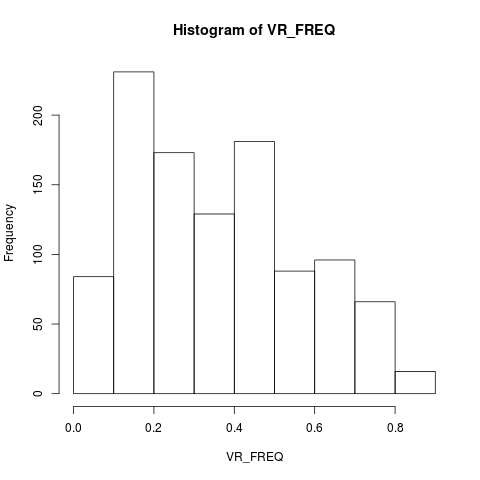

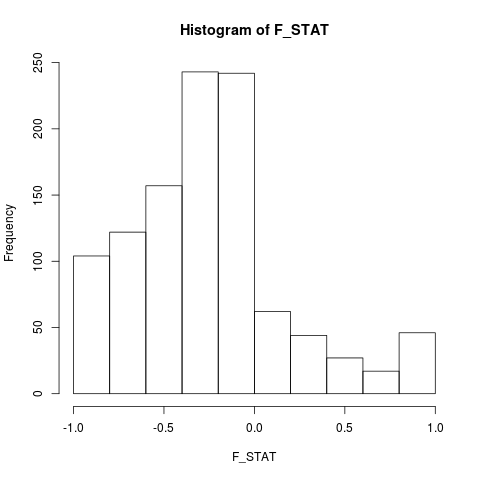

In [45]:
Rscript -e "library(data.table,quietly=TRUE);\
    DT <- fread('MAPGD_WORKING/TPP.subset.map',skip=\"@SCFNAME\",check.names=TRUE);\
    summary(DT[,c(6:23)]);\
    png('VR_FREQ.png');\
    DT[,hist(VR_FREQ)][NULL];\
    dev.off();\
    png('F_STAT.png');\
    DT[,hist(F_STAT)][NULL];\
    dev.off()"  2> /dev/null
display < VR_FREQ.png
display < F_STAT.png

## Calculate the 7 Coefficients

In [70]:
bsub << EOF
#!/bin/bash
#BSUB -J scaffold192_cov247_200kREL
#BSUB -o $LOGDIR/scaffold192_cov247_200kREL.out 
#BSUB -e $LOGDIR/scaffold192_cov247_200kREL.err
#BSUB -n 2,8 

mapgd relatedness \
    -i  ./MAPGD_WORKING/TPP.subset.geno \
    -o  ./MAPGD_WORKING/TPP.subset.relatedness 

EOF

Job <646837> is submitted to default queue <normal>.


In [71]:
head MAPGD_WORKING/TPP.subset.relatedness.rel

@NAME:RELATEDNESS	VERSION:0.4.29	FORMAT:TEXT
@SAMPLE_X	SAMPLE_Y	f_X	f_X_ll	f_Y	f_Y_ll	θ	θ_ll	γ_XY	γ_XY_ll	γ_YX	γ_YX_ll	δ	δ_ll	Δ	Δ_ll	null_ll	fit
0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	inf	10.2927	
0	2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	7.21187	7.21187	
0	3	-0.112626	0.382955	-0.026897	0.349808	-0.0342967	0.478569	0.0317293	1.3662	0.0741492	0.705012	-0.00303106	0.376231	0.0248325	0.725188	inf	13.3689	
0	4	0	0	0	0	0	0	0	0	0	0	0	0	0	0	6.78262	6.78262	
0	5	0	0	0	0	0	0	0	0	0	0	0	0	0	0	5.47754	5.47754	
0	6	-0.511601	2.27029	-0.313409	0.804839	0.013391	0.357139	-0.128721	0.60515	-0.0114974	0.505868	0.28544	2.46339	0.0759018	0.0861778	inf	10.3841	
0	7	0	0	0	0	0	0	0	0	0	0	0	0	0	0	26.0036	11.4854	
0	8	-0.241326	1.1488	-0.112664	0.292142	0.197662	2.47466	-0.115398	1.66549	-0.163496	1.77089	0.0149397	1.33413	0.309203	3.66926	23.0259	10.2726	


This core dumped

In [72]:
cat LOG/scaffold192_cov247_200kREL.err

gsl: lu.c:147: ERROR: matrix is singular
Default GSL error handler invoked.
/home/cfljam/.lsbatch/1550758970.646833.shell: line 6:  7950 Aborted                 (core dumped) mapgd relatedness -i ./MAPGD_WORKING/TPP.subset.geno -o ./MAPGD_WORKING/TPP.subset.relatedness
gsl: lu.c:147: ERROR: matrix is singular
Default GSL error handler invoked.
/home/cfljam/.lsbatch/1550759871.646837.shell: line 6: 26604 Aborted                 (core dumped) mapgd relatedness -i ./MAPGD_WORKING/TPP.subset.geno -o ./MAPGD_WORKING/TPP.subset.relatedness


## Upload Files to OSF

In [73]:
conda activate cfljam_MAPNET_POPGEN

(/workspace/appscratch/miniconda/cfljam_MAPNET_POPGEN) 

: 1

In [76]:
pwd

/powerplant/workspace/cfljam/Pop-Genomics-Workshop2019
(/workspace/appscratch/miniconda/cfljam_MAPNET_POPGEN) 

: 1